# Libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Loading data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
df = pd.concat([train,test])

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# List of features containing NA's

1. MSZoning, 
2. LotFrontage, 
3. Alley (more than 2000), 
4. Utilities, 
5. Exterior1st, 
6. Exterior2nd, 
7. MasVnrType, 
8. MasVnrArea, 
9. BsmtQual, 
10. BsmtCond, 
11. BsmtExposure, 
12. BsmtFinType1, 
13. BsmtFinSF1, 
14. BsmtFinType2, 
15. BsmtFinSF2, 
16. BsmtUnfSF, 
17. TotalBsmtSF, 
18. Electrical, 
19. BsmtFullBath, 
20. BsmtHalfBath, 
21. KitchenQual, 
22. Functional, 
23. FireplaceQu (more than 1000), 
24. GarageType,
25. GarageYrBlt,
26. GarageFinish,
27. GarageCars,
28. GarageArea,
29. GarageQual,
30. GarageCond,
31. PoolQC(more than 2000), 
32. Fence(more than 2000), 
33. MiscFeature (more than 2000), 
34. SaleType

# Handling with NA's

In [6]:
df.MSZoning[df.MSZoning.isna() == True] = random.choice(['A','C','FV','I','RH','RL','RP','RM'])

In [7]:
df.LotFrontage[df.LotFrontage.isna() == True] = df.LotFrontage.median()

In [8]:
df.Alley[df.Alley.isna()==True] = 'None'

In [9]:
df.Utilities[df.Utilities.isna() == True] = random.choice(['AllPub','NoSewr','NoSeWa','ELO'])

In [10]:
df.Exterior1st[df.Exterior1st.isna()==True] = random.choice(['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc',
                                                'MetalSd','Other','Plywodd','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'])
df.Exterior2nd[df.Exterior2nd.isna()==True] = random.choice(['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc',
                                                'MetalSd','Other','Plywodd','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'])


In [11]:
df.MasVnrType[df.MasVnrType.isna()==True] = random.choice(['BrkCmn','BrkFace','CBlock','None','Stone'])
df.MasVnrArea[df.MasVnrArea.isna()==True] = df.MasVnrArea.median()

In [12]:
df.BsmtQual[(df.BsmtQual.isna()==True) & (df.BsmtCond.isna()==True) & (df.BsmtExposure.isna()==True) & (df.BsmtFinType1.isna()==True)
   & (df.BsmtFinType2.isna()==True)] = 'None'
df.BsmtCond[(df.BsmtQual.isna()==True) & (df.BsmtCond.isna()==True) & (df.BsmtExposure.isna()==True) & (df.BsmtFinType1.isna()==True)
   & (df.BsmtFinType2.isna()==True)] = 'None'
df.BsmtExposure[(df.BsmtQual.isna()==True) & (df.BsmtCond.isna()==True) & (df.BsmtExposure.isna()==True) & (df.BsmtFinType1.isna()==True)
   & (df.BsmtFinType2.isna()==True)] = 'None'
df.BsmtFinType1[(df.BsmtQual.isna()==True) & (df.BsmtCond.isna()==True) & (df.BsmtExposure.isna()==True) & (df.BsmtFinType1.isna()==True)
   & (df.BsmtFinType2.isna()==True)] = 'None'
df.BsmtFinType2[(df.BsmtQual.isna()==True) & (df.BsmtCond.isna()==True) & (df.BsmtExposure.isna()==True) & (df.BsmtFinType1.isna()==True)
   & (df.BsmtFinType2.isna()==True)] = 'None'

In [13]:
df.BsmtQual[df.BsmtQual.isna()==True] = random.choice(['Ex','Gd','TA','Fa','Po'])
df.BsmtCond[df.BsmtCond.isna()==True] = random.choice(['Ex','Gd','TA','Fa','Po'])
df.BsmtExposure[df.BsmtExposure.isna()==True] = random.choice(['Gd','Av','Mn','No'])
df.BsmtFinType1[df.BsmtFinType1.isna()==True] = random.choice(['GLQ','ALQ','BLQ','Rec','LwQ','Unf'])
df.BsmtFinType2[df.BsmtFinType2.isna()==True] = random.choice(['GLQ','ALQ','BLQ','Rec','LwQ','Unf'])
df.BsmtFinSF1[df.BsmtFinSF1.isna()==True]=df.BsmtFinSF1.median()
df.BsmtFinSF2[df.BsmtFinSF2.isna()==True]=df.BsmtFinSF2.median()
df.BsmtUnfSF[df.BsmtUnfSF.isna()==True] = df.BsmtUnfSF.median()
df.TotalBsmtSF[df.TotalBsmtSF.isna()==True] = df.TotalBsmtSF.median()

In [14]:
df.Electrical[df.Electrical.isna()==True] = random.choice(['SBrkr','FuseA','FuseF','FuseP','Mix'])

In [15]:
df.BsmtFullBath[df.BsmtFullBath.isna()==True] = df.BsmtFullBath.median()
df.BsmtHalfBath[df.BsmtHalfBath.isna()==True] = df.BsmtHalfBath.median()

In [16]:
df.KitchenQual[df.KitchenQual.isna()==True] = random.choice(['Ex','Gd','TA','Fa','Po'])
df.Functional[df.Functional.isna()==True] = random.choice(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'])

In [17]:
df.FireplaceQu[(df.FireplaceQu.isna()==True) & (df.Fireplaces == 0)] = 'None'

In [18]:
df.GarageType[(df.GarageType.isna()==True) & (df.GarageYrBlt.isna()==True) & (df.GarageFinish.isna()==True) & 
              (df.GarageCars.isna()==True) & (df.GarageArea.isna()==True) & (df.GarageQual.isna()==True) 
             & (df.GarageCond.isna()==True)] = 'None'
df.GarageFinish[(df.GarageType.isna()==True) & (df.GarageYrBlt.isna()==True) & (df.GarageFinish.isna()==True) & 
              (df.GarageCars.isna()==True) & (df.GarageArea.isna()==True) & (df.GarageQual.isna()==True) 
             & (df.GarageCond.isna()==True)] = 'None'
df.GarageQual[(df.GarageType.isna()==True) & (df.GarageYrBlt.isna()==True) & (df.GarageFinish.isna()==True) & 
              (df.GarageCars.isna()==True) & (df.GarageArea.isna()==True) & (df.GarageQual.isna()==True) 
             & (df.GarageCond.isna()==True)] = 'None'
df.GarageCond[(df.GarageType.isna()==True) & (df.GarageYrBlt.isna()==True) & (df.GarageFinish.isna()==True) & 
              (df.GarageCars.isna()==True) & (df.GarageArea.isna()==True) & (df.GarageQual.isna()==True) 
             & (df.GarageCond.isna()==True)] = 'None'
df.GarageYrBlt[(df.GarageType.isna()==True) & (df.GarageYrBlt.isna()==True) & (df.GarageFinish.isna()==True) & 
              (df.GarageCars.isna()==True) & (df.GarageArea.isna()==True) & (df.GarageQual.isna()==True) 
             & (df.GarageCond.isna()==True)] = 0
df.GarageCars[(df.GarageType.isna()==True) & (df.GarageYrBlt.isna()==True) & (df.GarageFinish.isna()==True) & 
              (df.GarageCars.isna()==True) & (df.GarageArea.isna()==True) & (df.GarageQual.isna()==True) 
             & (df.GarageCond.isna()==True)] = 0
df.GarageArea[(df.GarageType.isna()==True) & (df.GarageYrBlt.isna()==True) & (df.GarageFinish.isna()==True) & 
              (df.GarageCars.isna()==True) & (df.GarageArea.isna()==True) & (df.GarageQual.isna()==True) 
             & (df.GarageCond.isna()==True)] = 0

In [19]:
df.GarageType[df.GarageType.isna()==True] = random.choice(['2Types','Attchd','Basment','BuiltIn','CarPort','Detchd'])
df.GarageYrBlt[df.GarageYrBlt.isna()==True] = df.GarageYrBlt.median()
df.GarageFinish[df.GarageFinish.isna()==True] = random.choice(['Fin','RFn','Unf'])
df.GarageCars[df.GarageCars.isna()==True] = df.GarageCars.median()
df.GarageArea[df.GarageArea.isna()==True] = df.GarageArea.median()
df.GarageQual[df.GarageQual.isna()==True] = random.choice(['Ex','Gd','TA','Fa','Po'])
df.GarageCond[df.GarageCond.isna()==True] = random.choice(['Ex','Gd','TA','Fa','Po'])

In [20]:
df.PoolQC[(df.PoolQC.isna()==True) & (df.PoolArea == 0)] = 'None'
df.PoolQC[df.PoolQC.isna()==True] = random.choice(['Ex','Gd','TA','Fa'])

In [21]:
df.Fence[df.Fence.isna()==True] = 'None'
df.MiscFeature[df.MiscFeature.isna()==True] = 'None'
df.SaleType[df.SaleType.isna()==True] = random.choice(['WD','CWD','VWD','New','COD','Con','ConLw','ConLI','ConLD','Oth'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# EDA 

Changing categorical variables into binary

In [23]:
df1 = df[df.columns[0:20]]
df1["SalePrice"] = df.SalePrice
df1 = df1.drop(["Id"],axis=1)
df2 = df[df.columns[21:40]]
df2["SalePrice"] = df.SalePrice
df3 = df[df.columns[41:60]]
df3["SalePrice"] = df.SalePrice
df4 = df[df.columns[61:]]

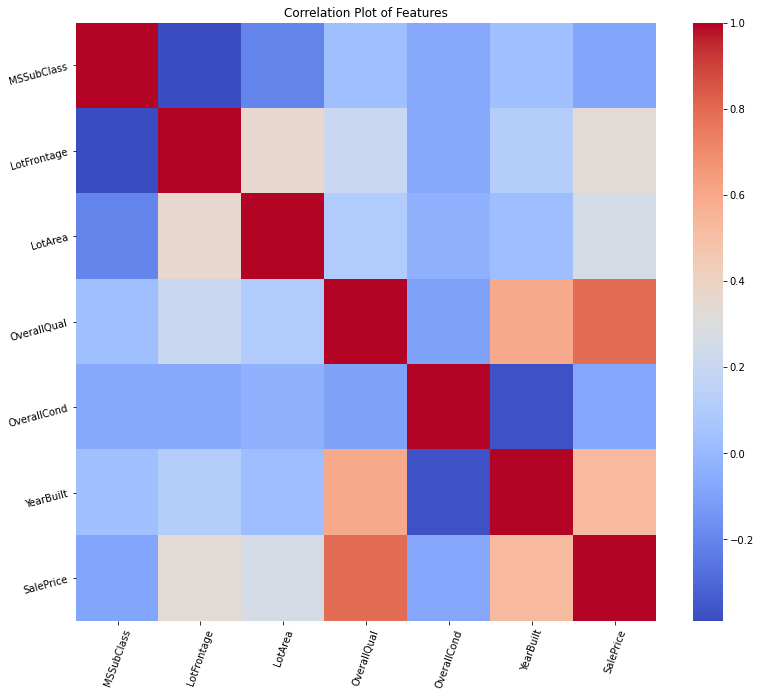

In [24]:
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(df1.corr(),cmap='coolwarm')
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Correlation Plot of Features")
plt.show()

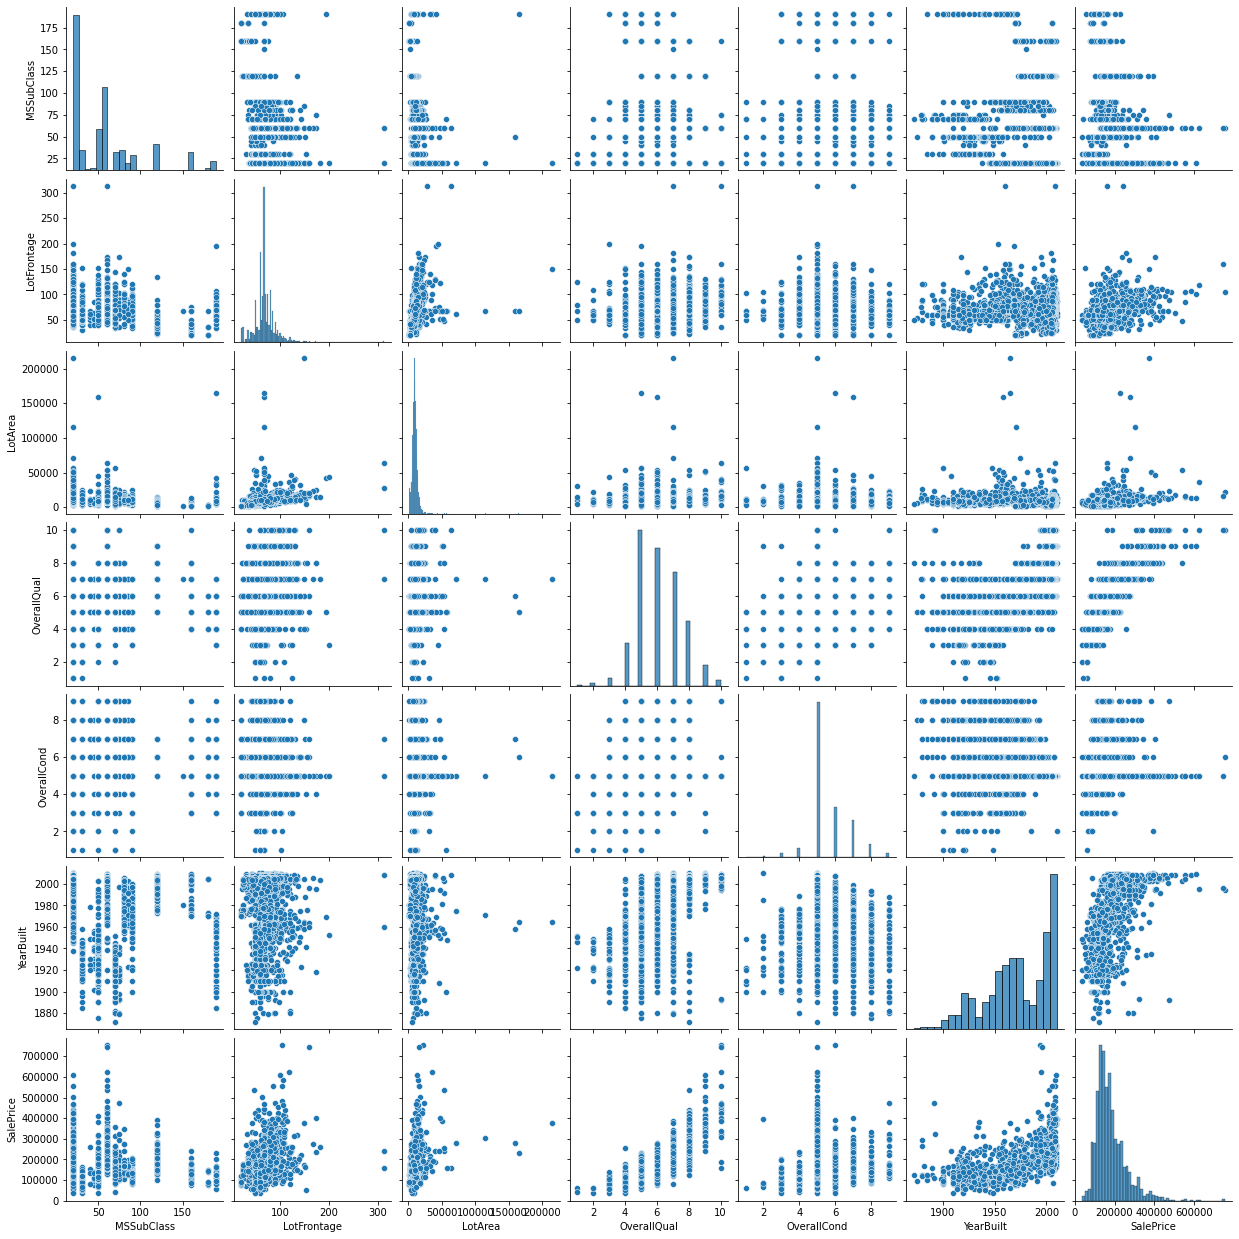

In [25]:
sns.pairplot(df1, dropna=True)
plt.show()

Sale Price is positively correlated with Overall Quality feature. We might notice this relationship on the pairplot. A slightly less correlation can be noticed between Sale Price and Overall Condition. Sale Price and Year Built are aswell positively correlated. The newest houses are the ones with the highest price.

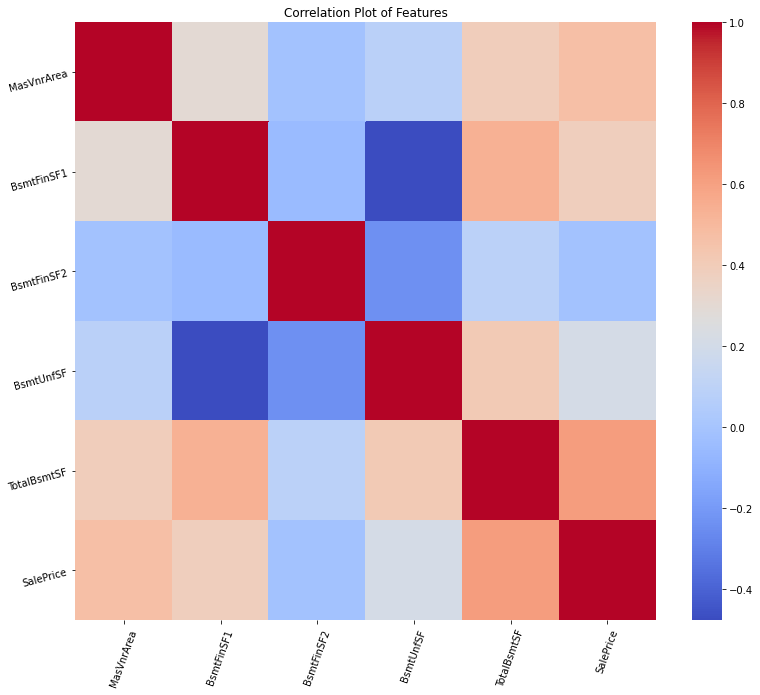

In [26]:
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(df2.corr(),cmap='coolwarm')
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Correlation Plot of Features")
plt.show()

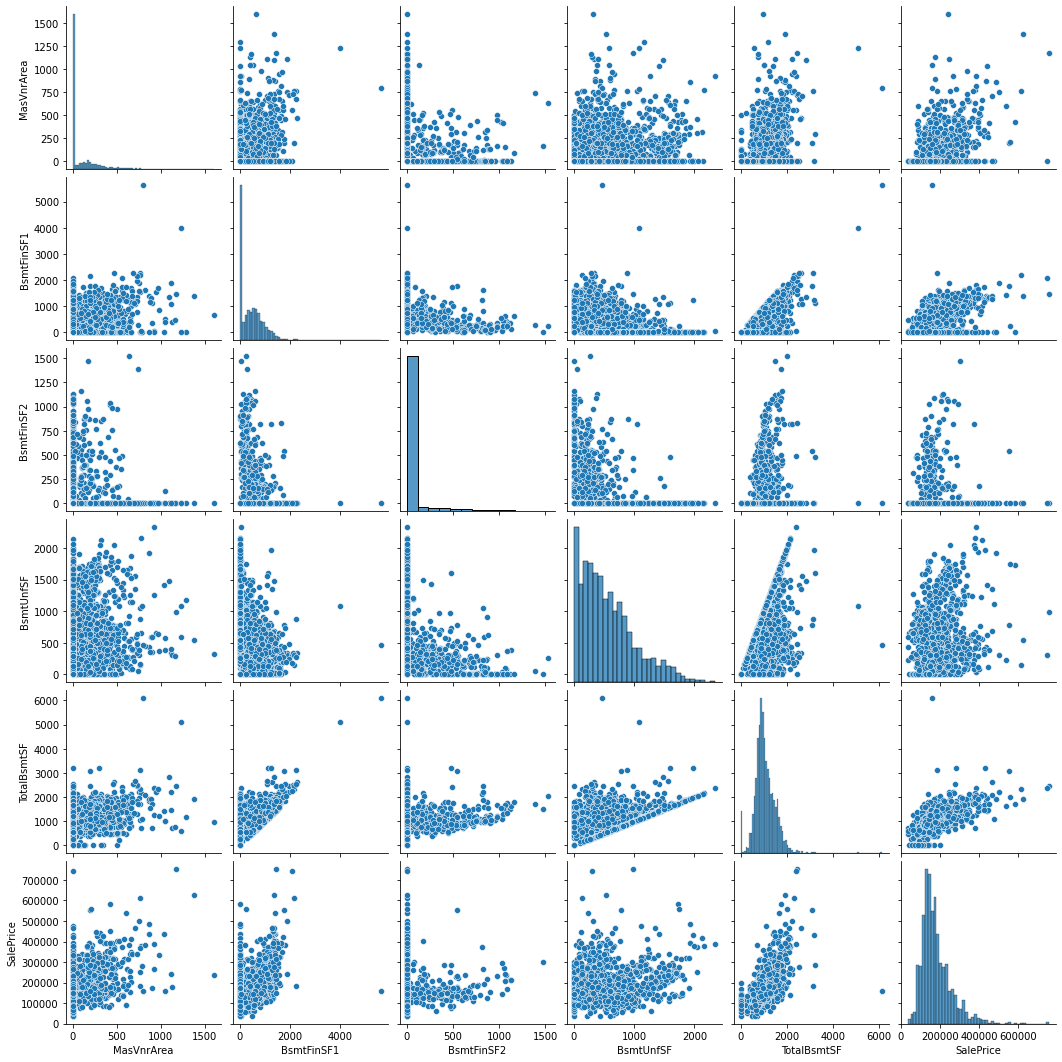

In [27]:
sns.pairplot(df2)
plt.show()

Sale Price is positively correlated with MasVnrArea which is presented in square feet. Similarly with BsmntFinSF1 and BsmntFinSF2 but this explains the positive correlation between Sale Price and TotalBsmntSF. As TotalBsmntSF is depended from the BsmntFinSF1 and BsmntFinSF2 it will be the only feature taken into the account.

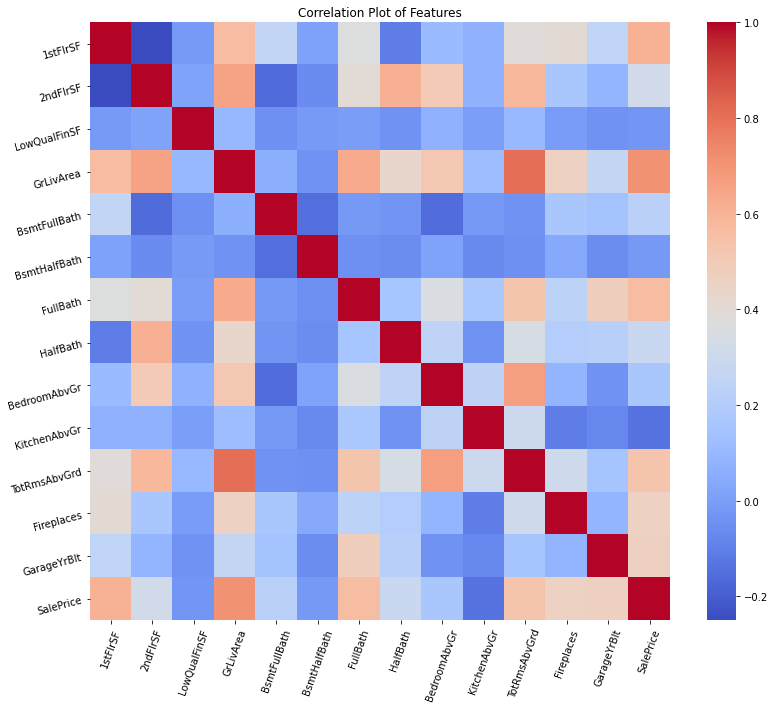

In [28]:
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(df3.corr(),cmap='coolwarm')
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Correlation Plot of Features")
plt.show()

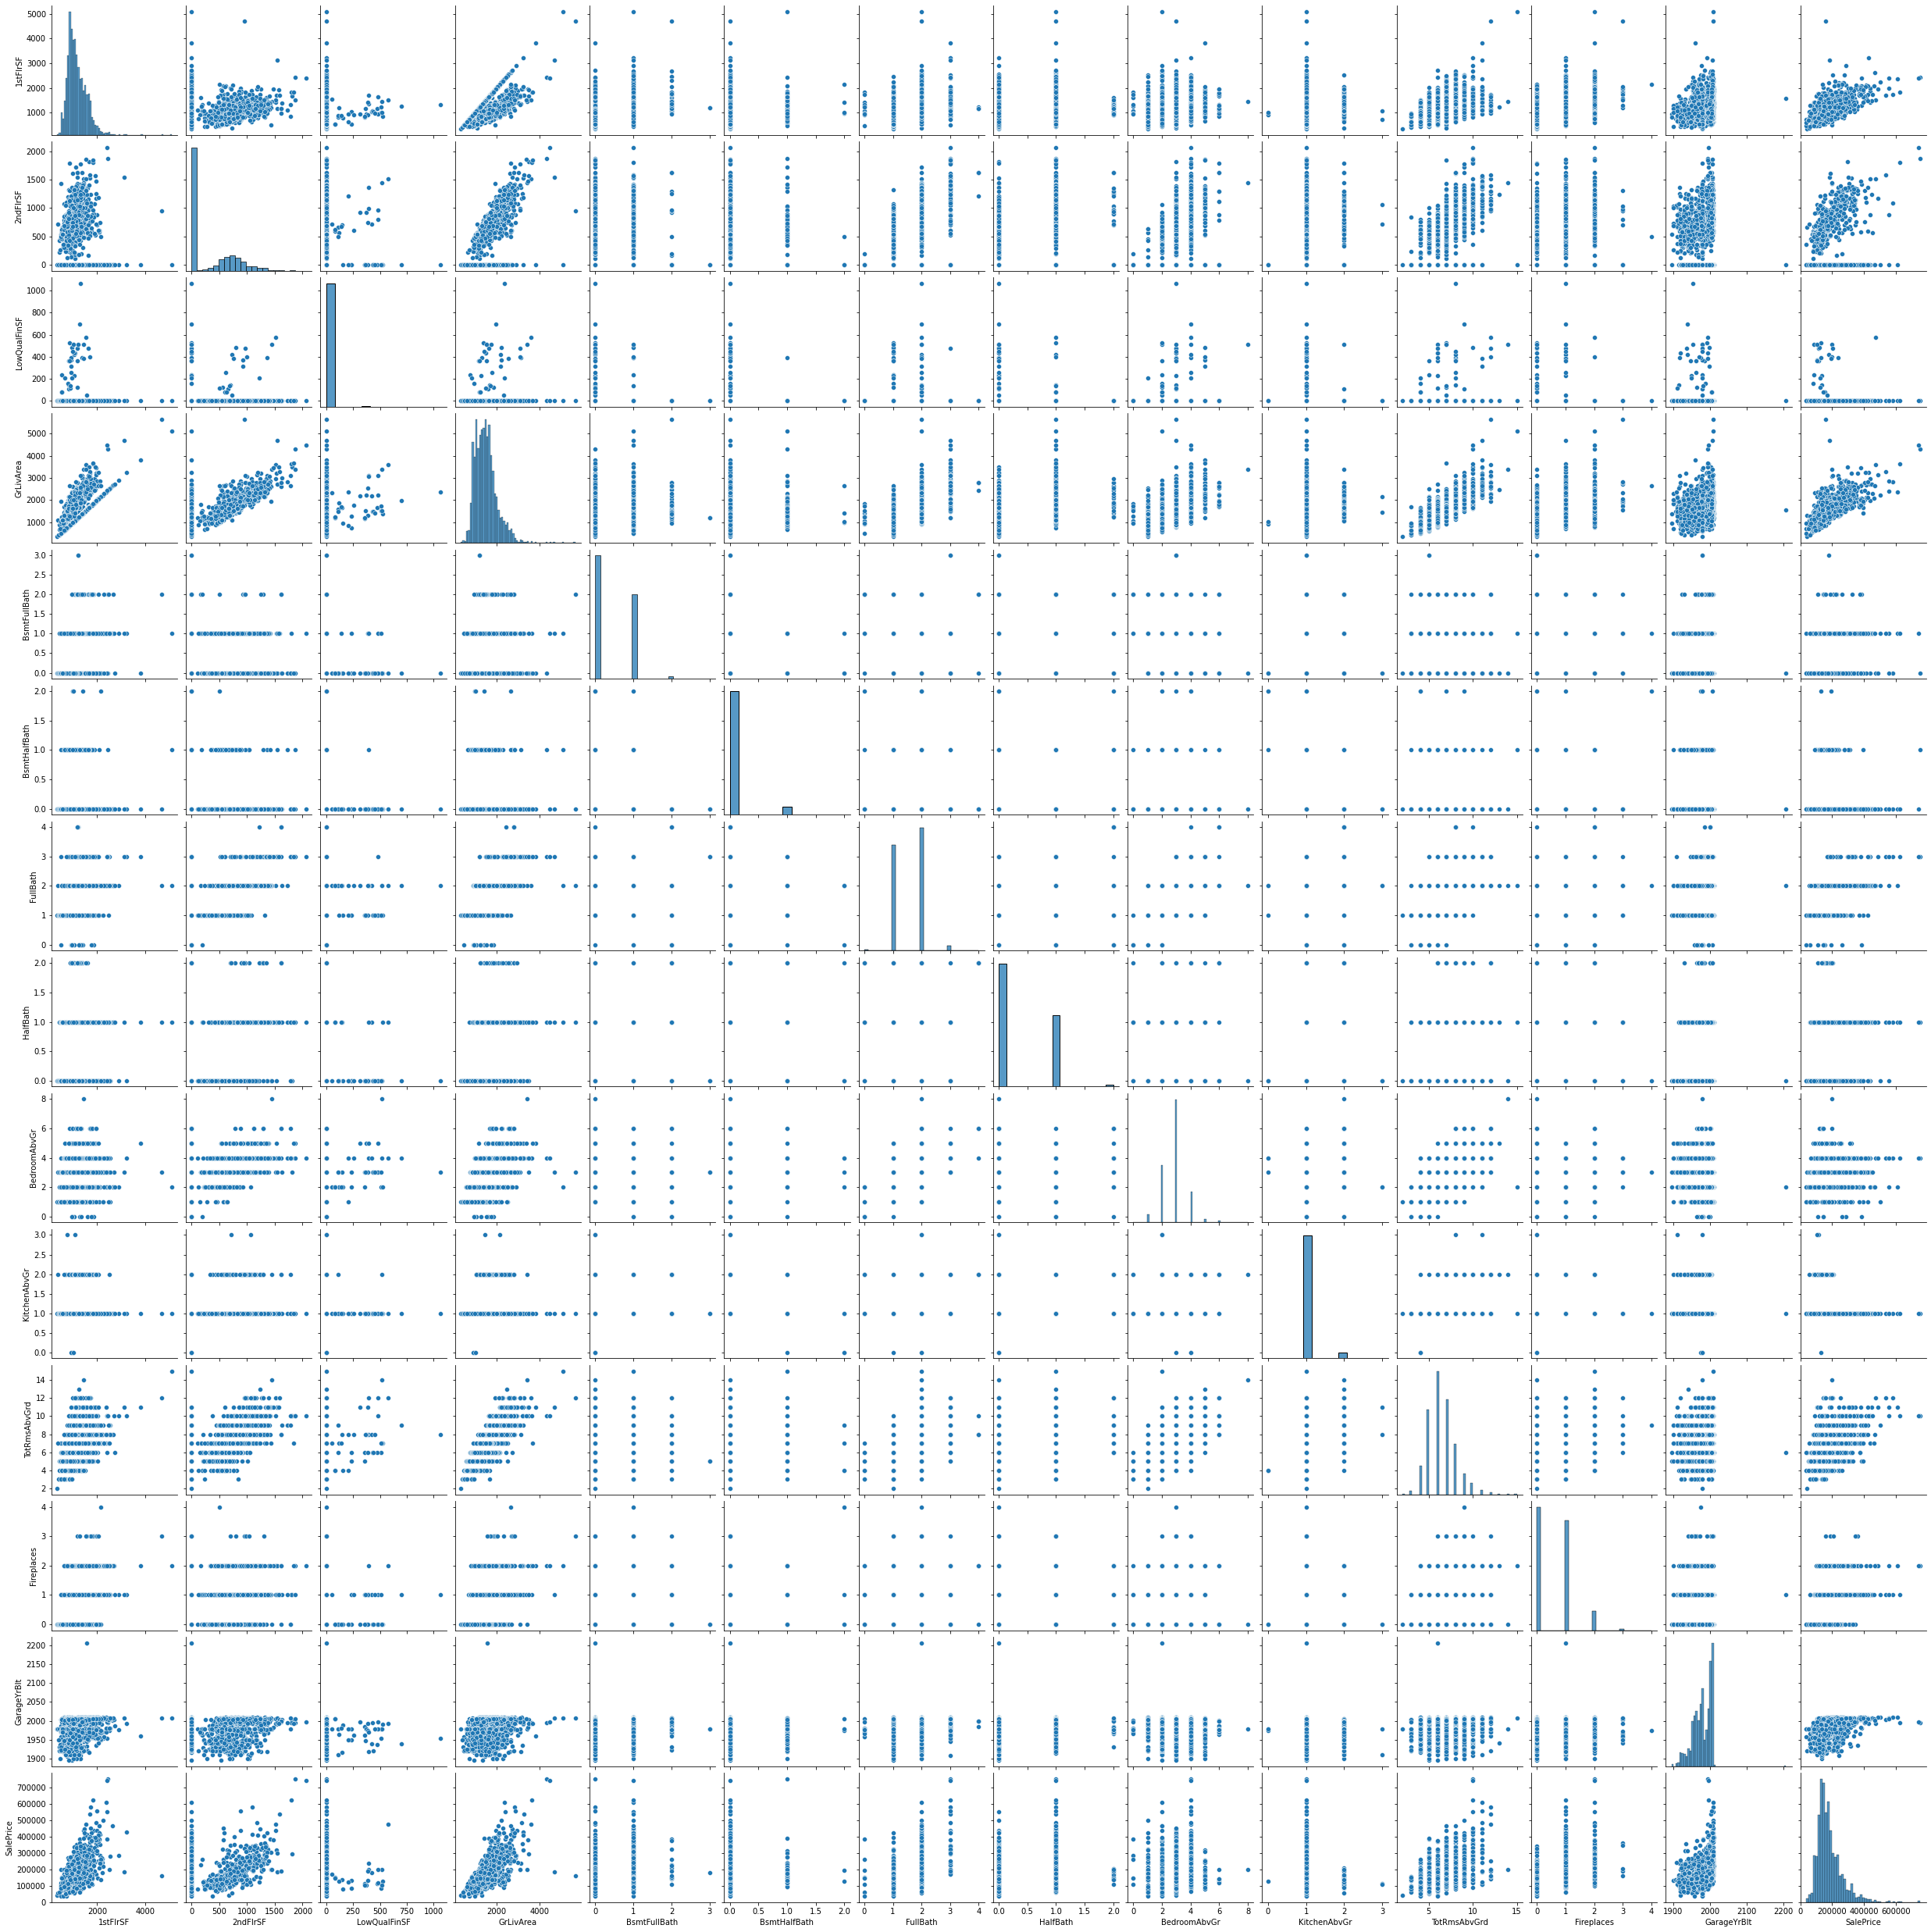

In [29]:
sns.pairplot(df3)
plt.show()

1stFlrSF and 2ndFlrSF are positively correlated with Sale Price (fact that not every house contain 2nd floor affects the low correlation). Same situation is between GrLiveArea and Sale Price. Those concludes are kinda obvious as the amount of area in the house is probably one of the most important factors to consider. Full Bath is also positively correlated with Sale Price aswell as Total Rooms Above Ground. Number of Fireplaces might influence the Sale Price too, similarly like Year of Building Garage.

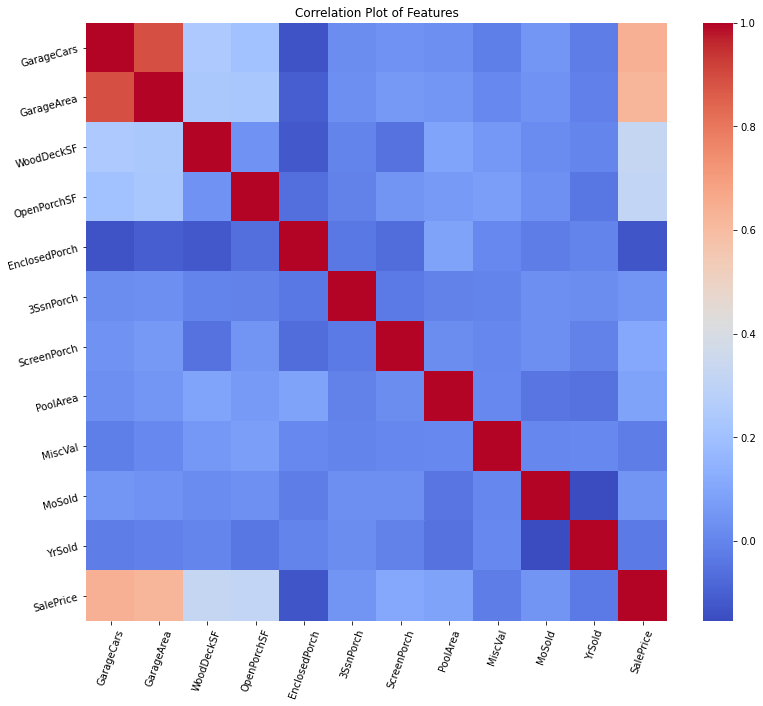

In [30]:
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(df4.corr(),cmap='coolwarm')
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Correlation Plot of Features")
plt.show()

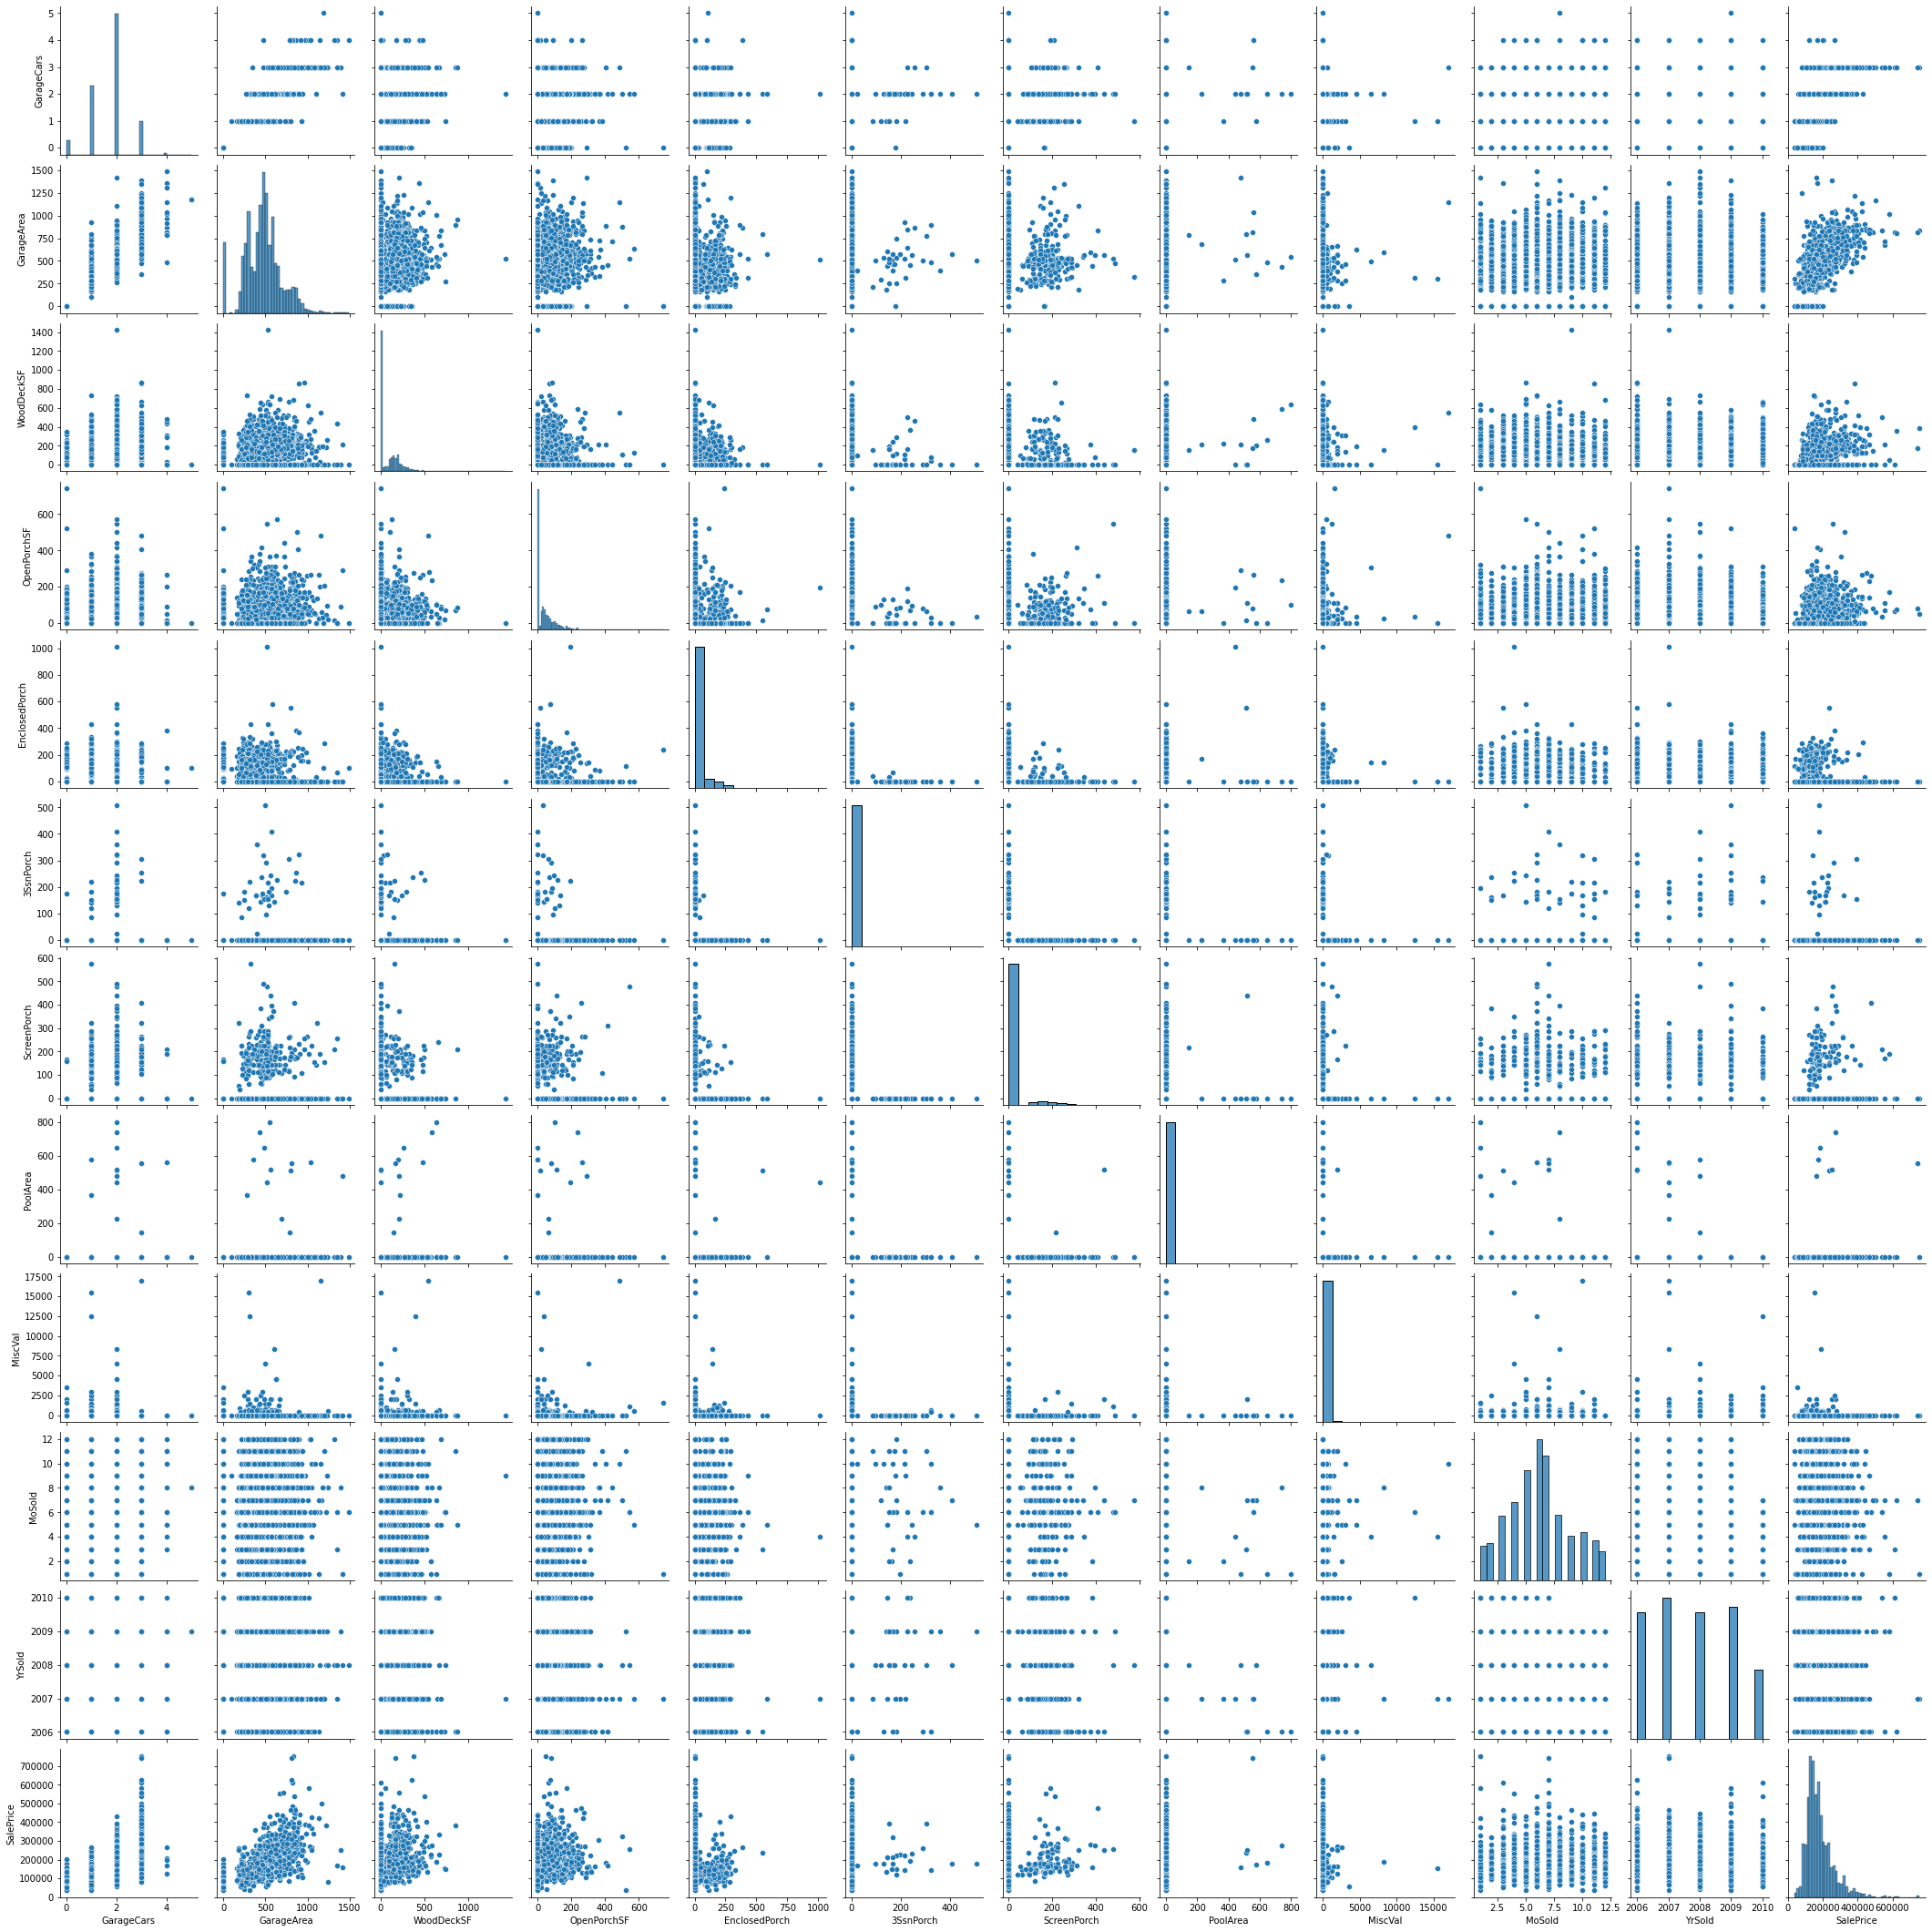

In [31]:
sns.pairplot(df4)
plt.show()

Obviously both sizes of garage influences the Sale Price and to reduce number of features only in car capacity will be taken into the account. Based on pairplots and correlations heatmaps those features will be considered in next steps:
1. OverallQual
2. YearBuilt
3. TotalBsmntSF
4. 1stFlrSF
5. 2ndFlrSF
6. GrLiveArea
7. FullBath
8. TotRmsAbvGrd
9. Fireplaces
10. GarageYrBlt
11. GarageCars

In [32]:
dff = df[["OverallQual","YearBuilt","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","SalePrice"]]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [34]:
df_obj = df.select_dtypes(include='object')
labelencoder = preprocessing.LabelEncoder()

In [35]:
df_obj = df_obj.apply(labelencoder.fit_transform)

In [36]:
df5 = df_obj[df_obj.columns[0:11]]
df5["SalePrice"] = df.SalePrice
df6 = df_obj[df_obj.columns[12:22]]
df6["SalePrice"] = df.SalePrice
df7 = df_obj[df_obj.columns[23:33]]
df7["SalePrice"] = df.SalePrice
df8 = df_obj[df_obj.columns[33:]]
df8["SalePrice"] = df.SalePrice

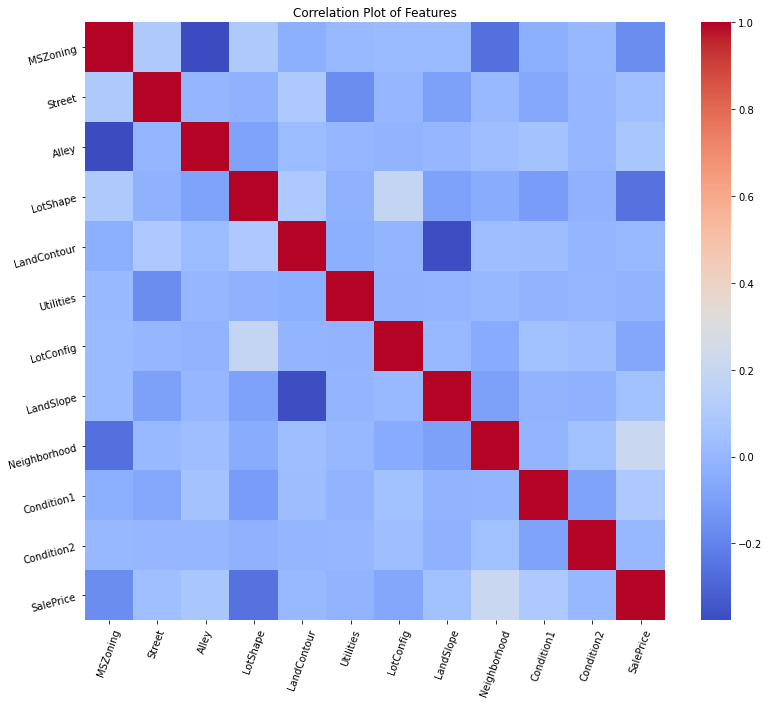

In [37]:
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(df5.corr(),cmap='coolwarm')
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Correlation Plot of Features")
plt.show()

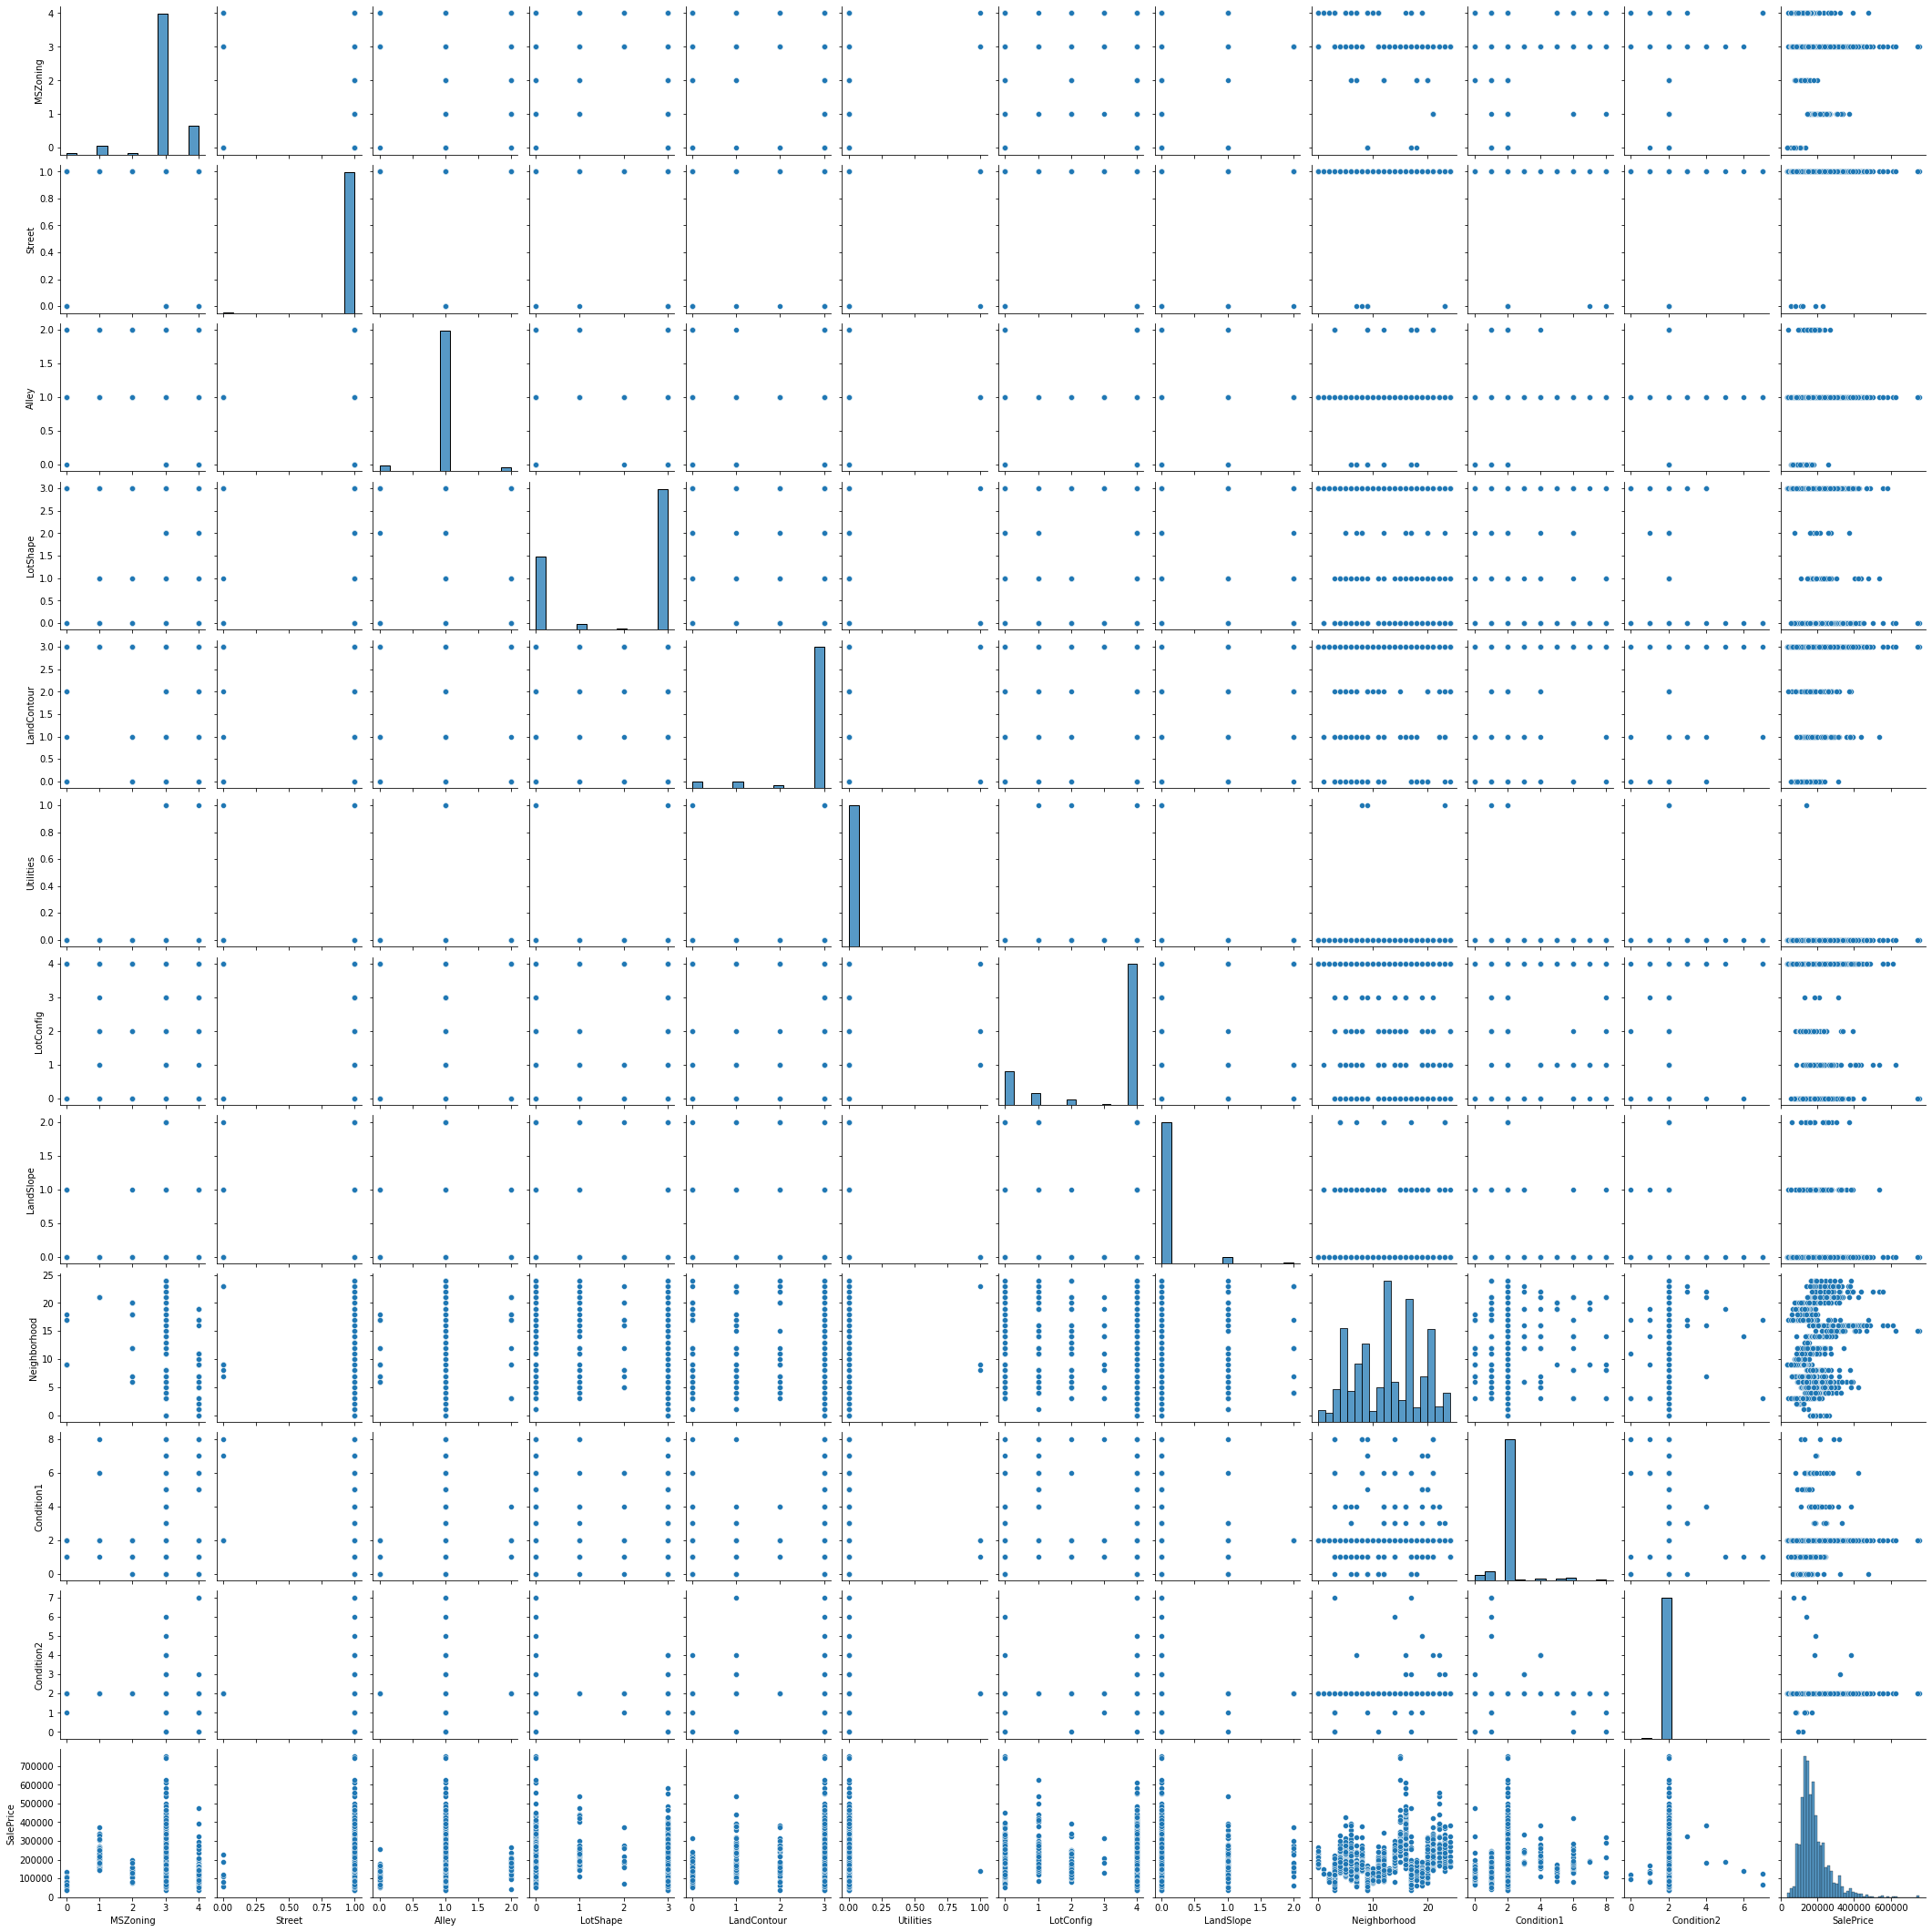

In [38]:
sns.pairplot(df5)
plt.show()

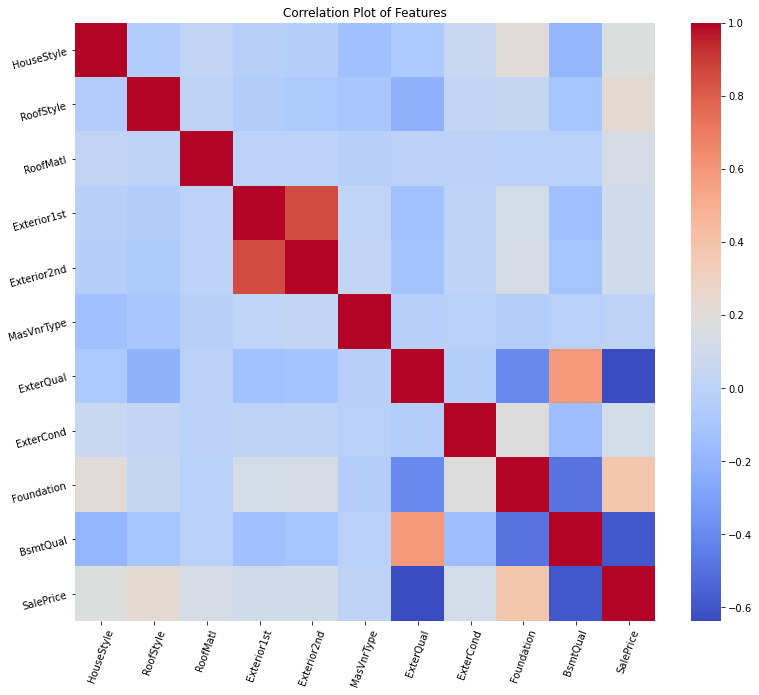

In [39]:
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(df6.corr(),cmap='coolwarm')
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Correlation Plot of Features")
plt.show()

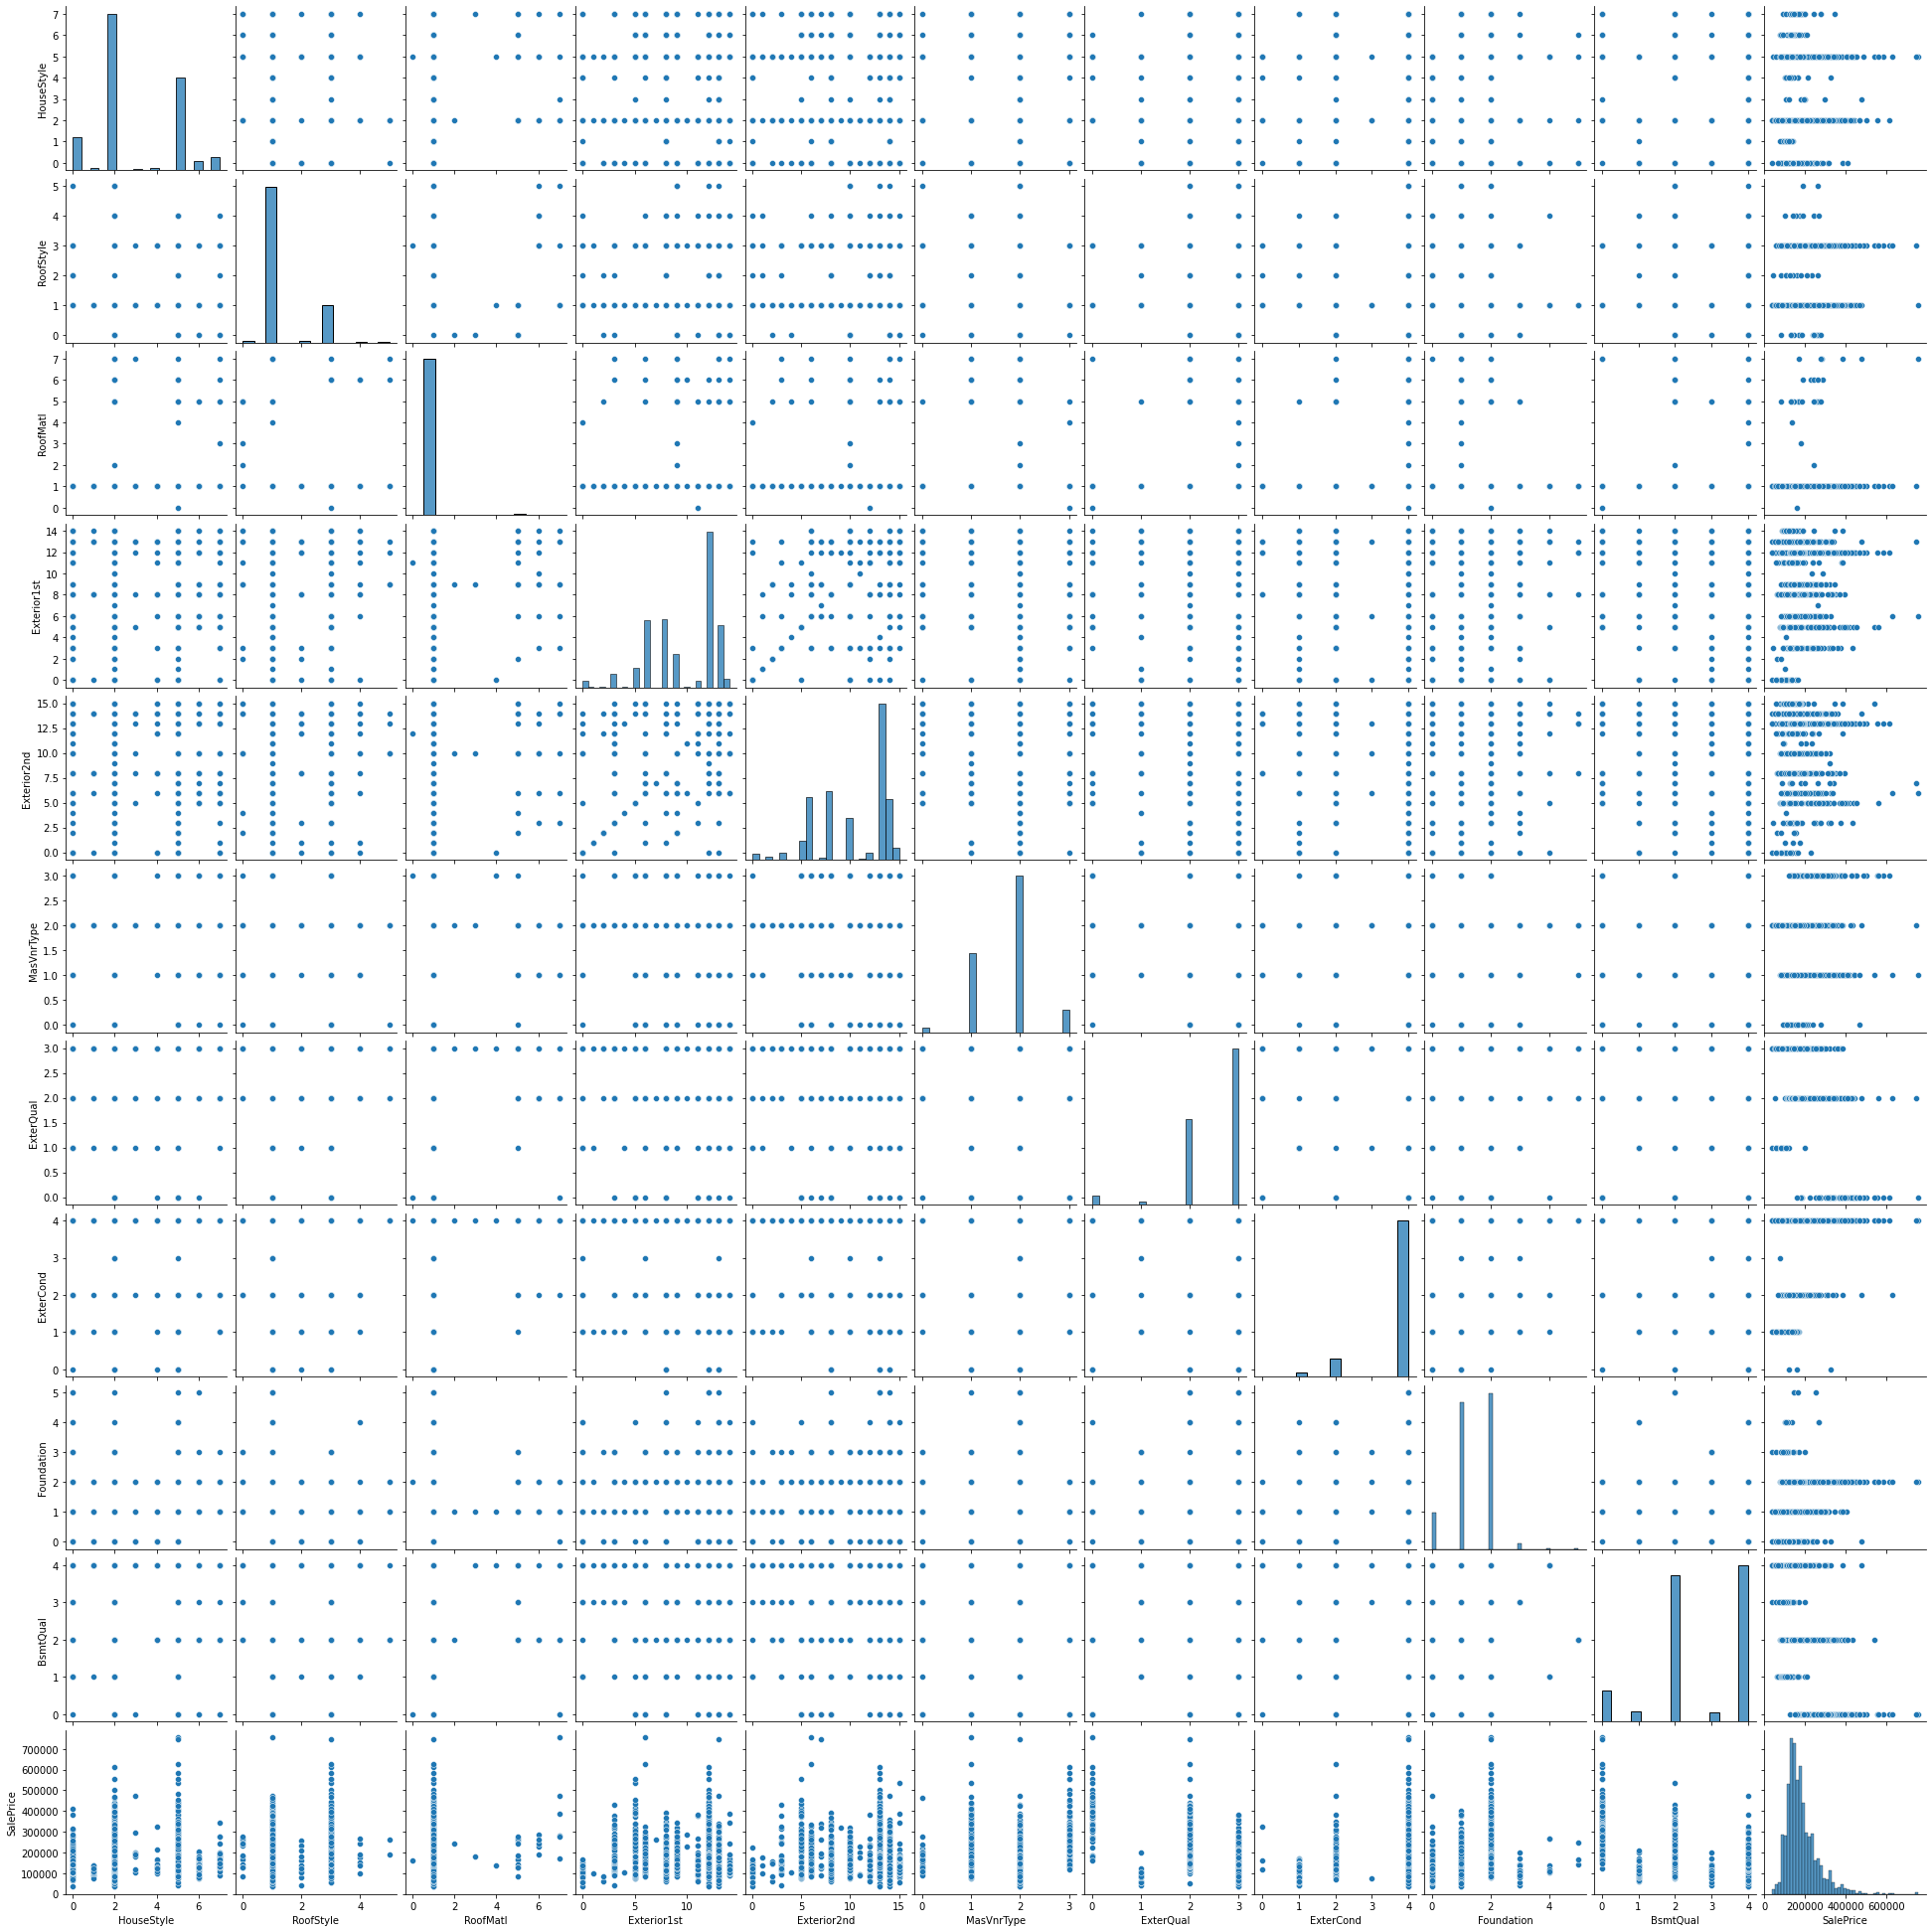

In [40]:
sns.pairplot(df6)
plt.show()

ExterQual is negatively correlated with Sale Price. Foundation is positively correlated with Sale Price.

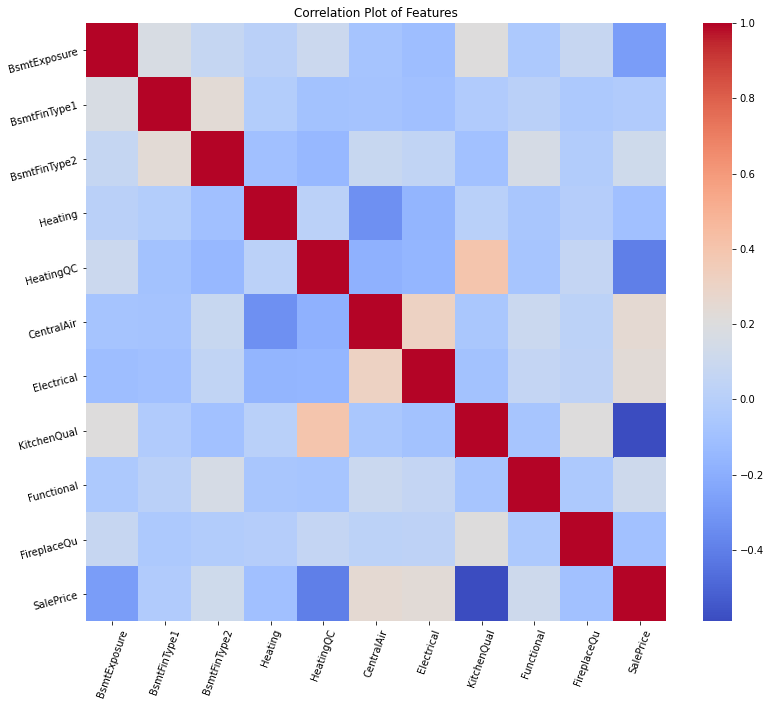

In [41]:
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(df7.corr(),cmap='coolwarm')
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Correlation Plot of Features")
plt.show()

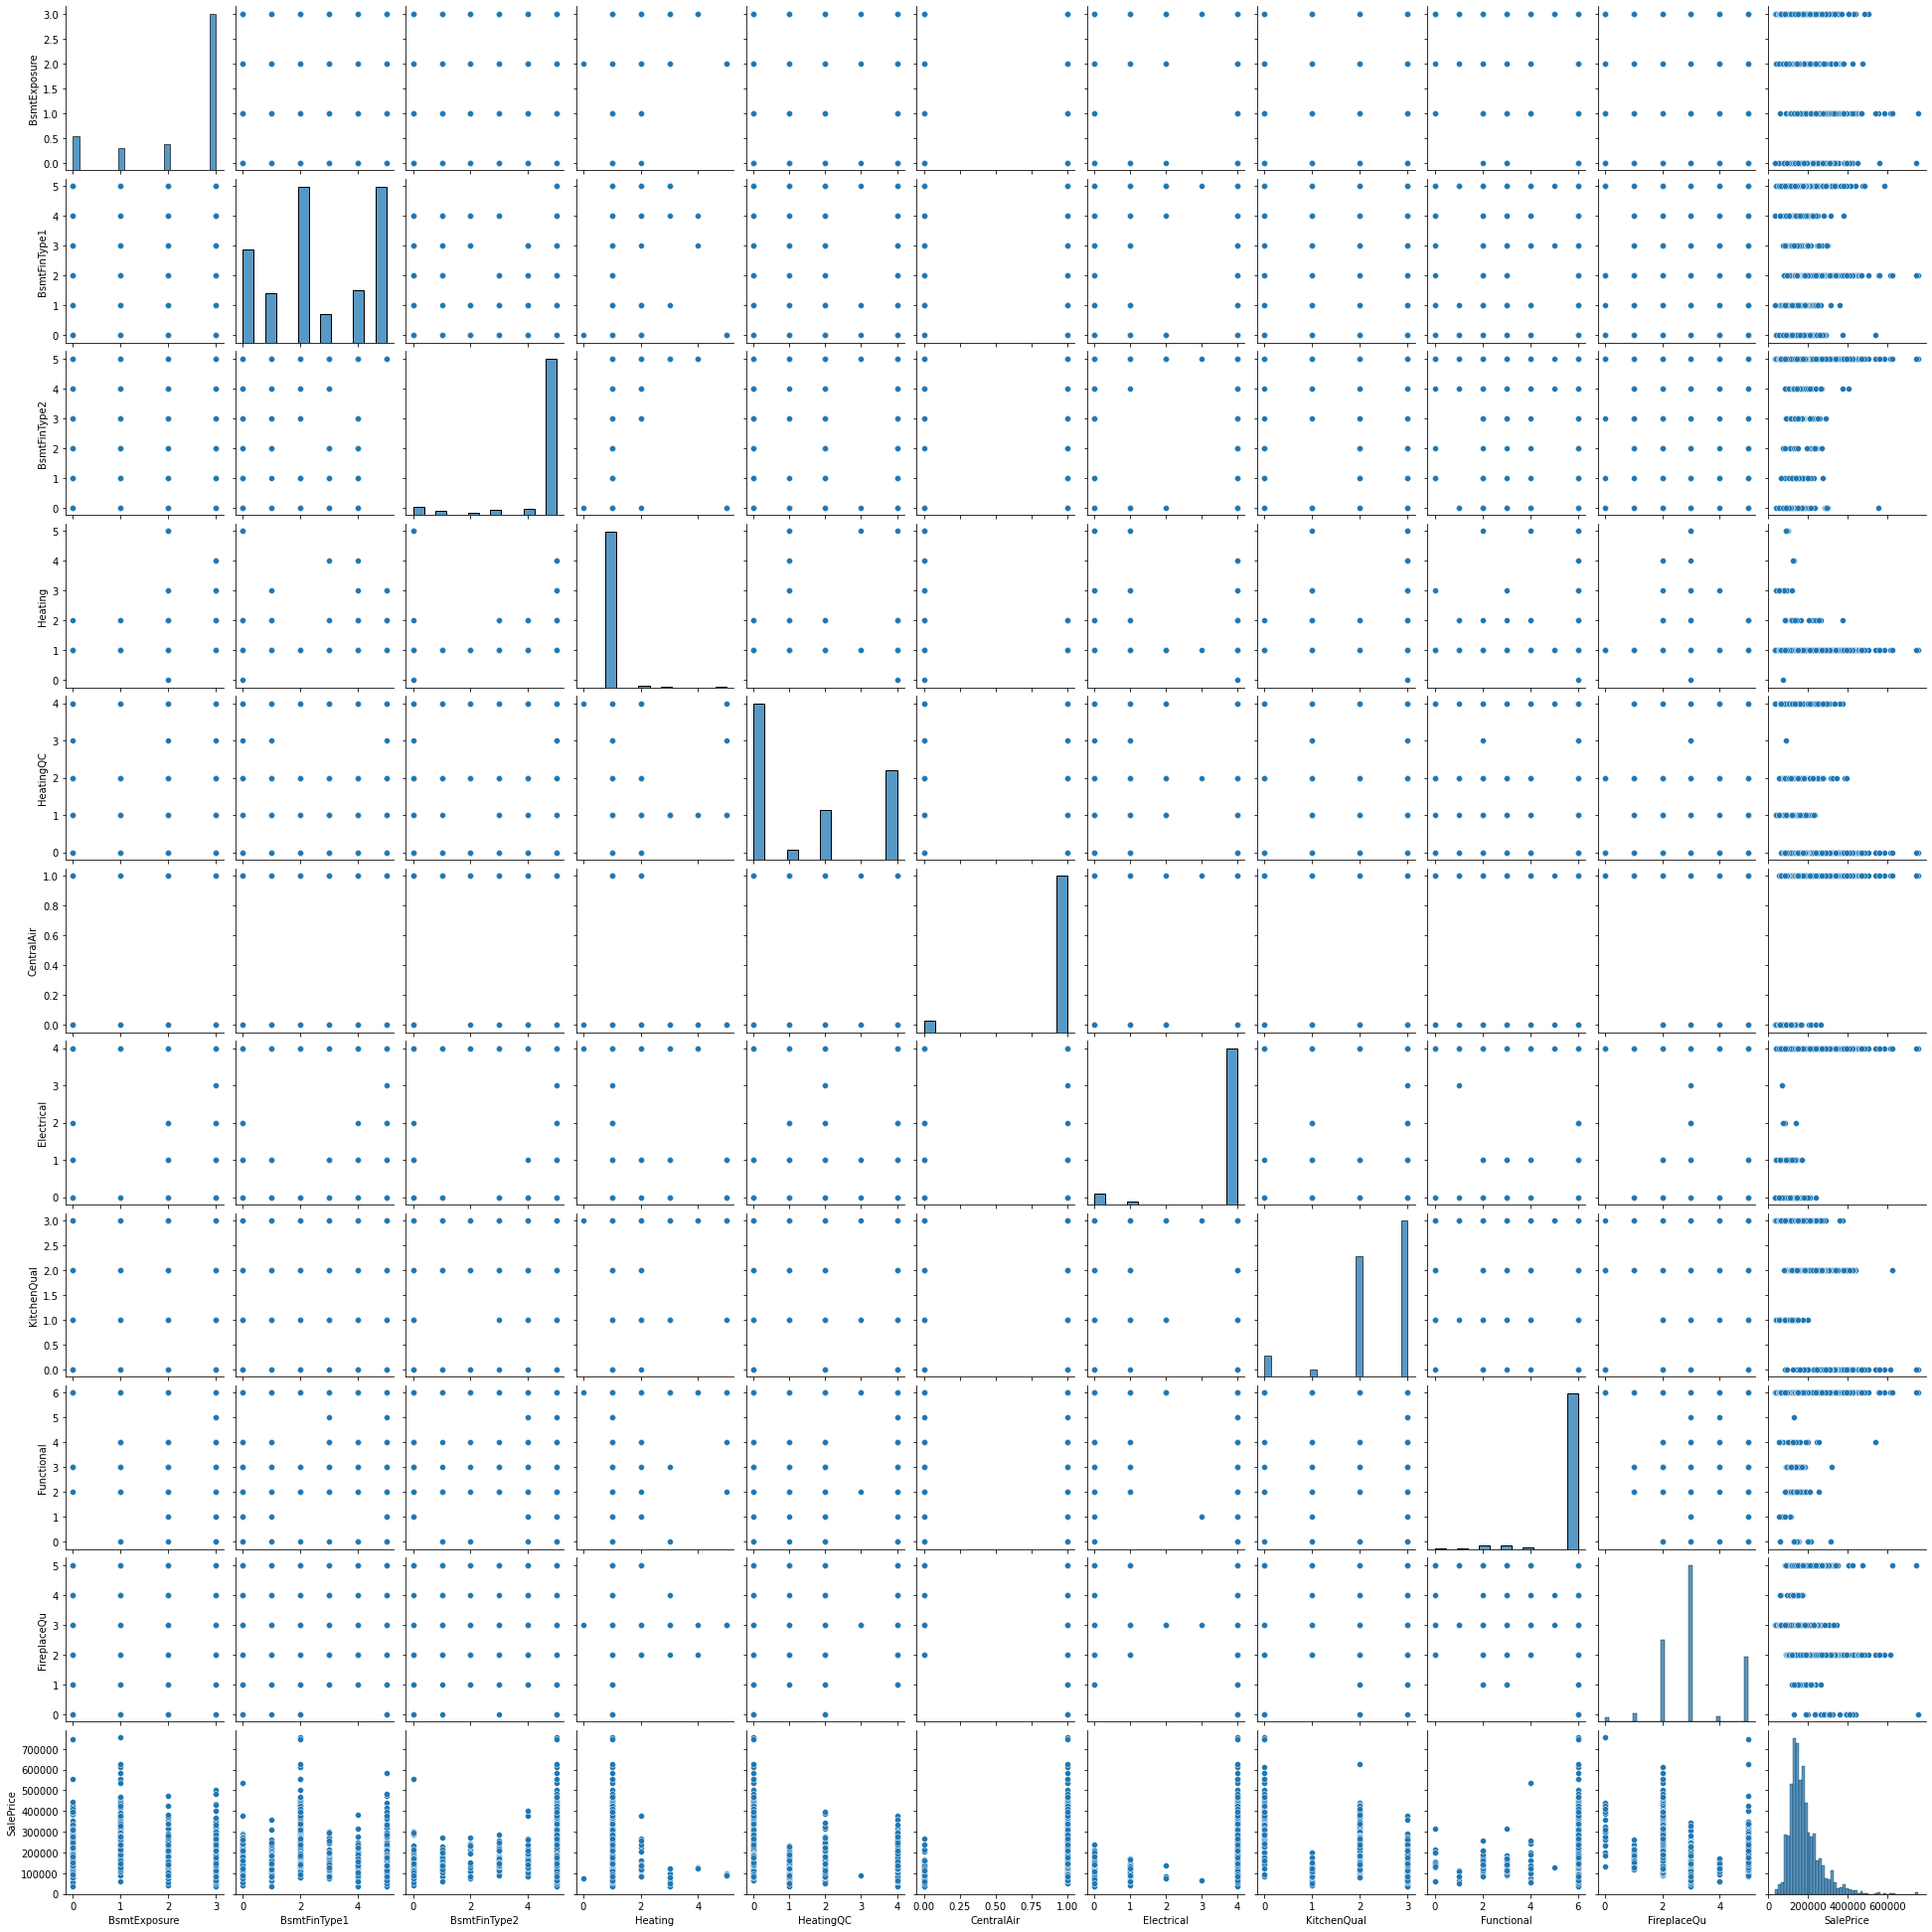

In [42]:
sns.pairplot(df7)
plt.show()

KitchenQual is negatively correlated with Sale Price.

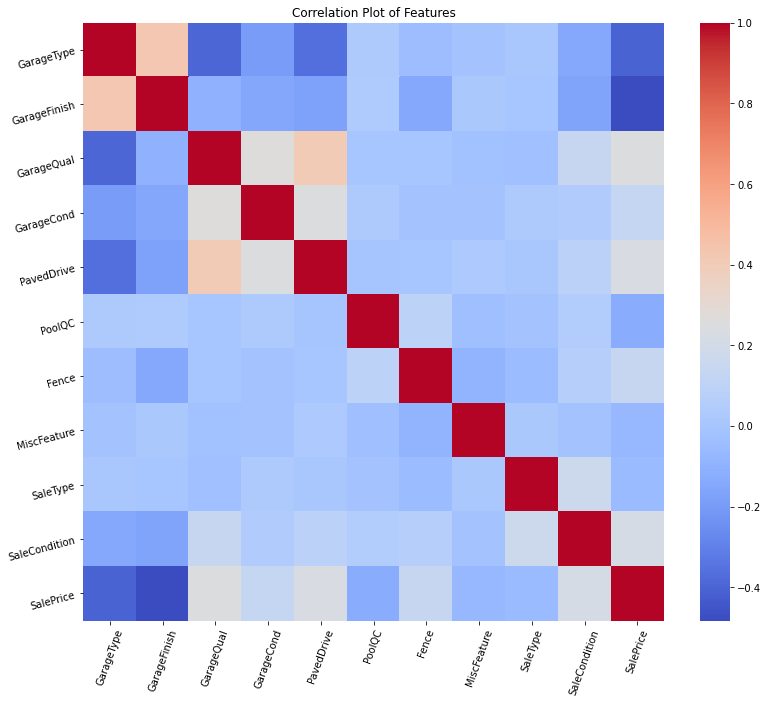

In [43]:
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(df8.corr(),cmap='coolwarm')
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Correlation Plot of Features")
plt.show()

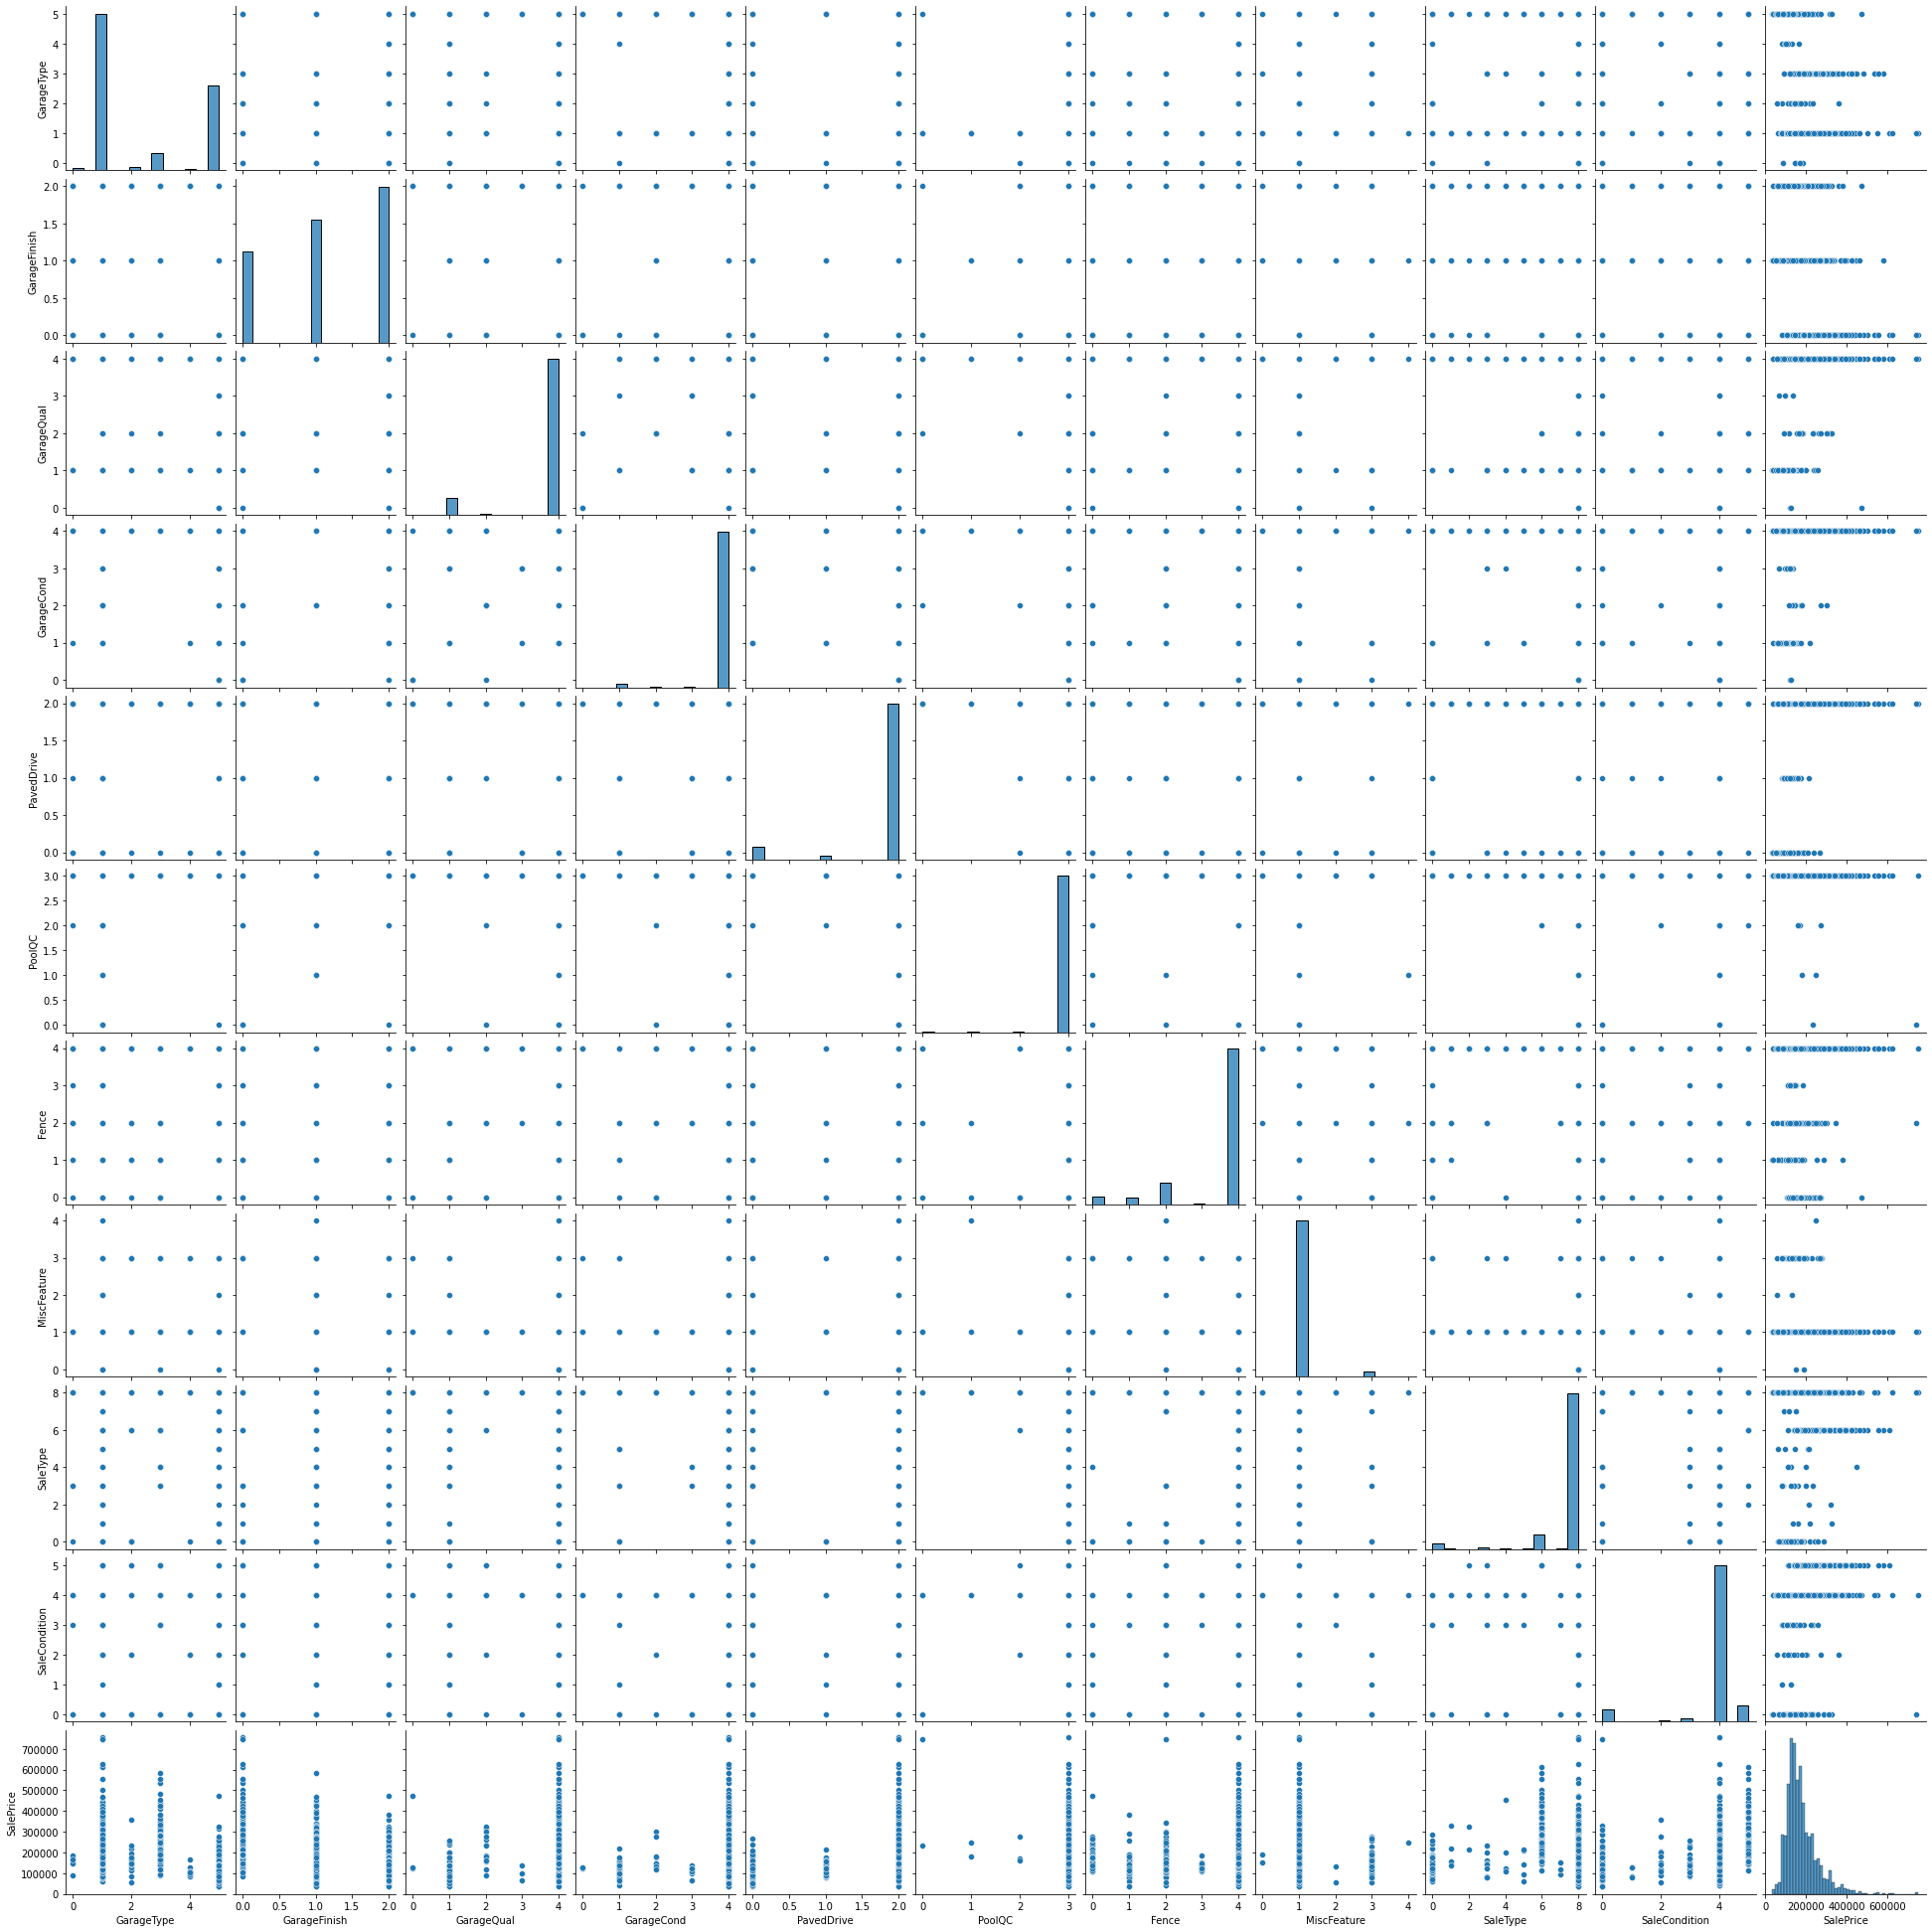

In [44]:
sns.pairplot(df8)
plt.show()

GarageFinish is negatively correlated with Sale Price.

In [45]:
df_obj_mod = df_obj[["ExterQual","Foundation","KitchenQual","GarageFinish"]]

In [46]:
labelencoder.fit(df['ExterQual'])
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

{'Ex': 0, 'Fa': 1, 'Gd': 2, 'TA': 3}


In [47]:
labelencoder.fit(df['Foundation'])
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

{'BrkTil': 0, 'CBlock': 1, 'PConc': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5}


In [48]:
labelencoder.fit(df['KitchenQual'])
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

{'Ex': 0, 'Fa': 1, 'Gd': 2, 'TA': 3}


In [49]:
labelencoder.fit(df['GarageFinish'])
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

{'Fin': 0, 'RFn': 1, 'Unf': 2}


As we have seen, ExterQual, Kitchen Qual and GarageFinish are negatively correlated with Sale Price. This means that the better materials used the higher sale price is aswell as the fact that finished garage has influence on the price. What is more, Brick and Tile, Cinder Block and Poured Contrete are the best saled types of foundation

In [50]:
#Creating a data frame with all features which will be used
dff = df[["OverallQual","YearBuilt","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath",
          "TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","ExterQual","KitchenQual",
          "Foundation","GarageFinish","SalePrice"]]

In [51]:
dff.ExterQual = labelencoder.fit_transform(dff.ExterQual)
dff.KitchenQual = labelencoder.fit_transform(dff.KitchenQual)
dff.Foundation = labelencoder.fit_transform(dff.Foundation)
dff.GarageFinish = labelencoder.fit_transform(dff.GarageFinish)

In [52]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   YearBuilt     2919 non-null   int64  
 2   TotalBsmtSF   2919 non-null   float64
 3   1stFlrSF      2919 non-null   int64  
 4   2ndFlrSF      2919 non-null   int64  
 5   GrLivArea     2919 non-null   int64  
 6   FullBath      2919 non-null   int64  
 7   TotRmsAbvGrd  2919 non-null   int64  
 8   Fireplaces    2919 non-null   int64  
 9   GarageYrBlt   2919 non-null   float64
 10  GarageCars    2919 non-null   float64
 11  ExterQual     2919 non-null   int32  
 12  KitchenQual   2919 non-null   int32  
 13  Foundation    2919 non-null   int32  
 14  GarageFinish  2919 non-null   int32  
 15  SalePrice     1460 non-null   float64
dtypes: float64(4), int32(4), int64(8)
memory usage: 342.1 KB


In [53]:
dff.head()

OverallQual  YearBuilt  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0            7       2003        856.0       856       854       1710   
1            6       1976       1262.0      1262         0       1262   
2            7       2001        920.0       920       866       1786   
3            7       1915        756.0       961       756       1717   
4            8       2000       1145.0      1145      1053       2198   

   FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  ExterQual  \
0         2             8           0       2003.0         2.0          2   
1         2             6           1       1976.0         2.0          3   
2         2             6           1       2001.0         2.0          2   
3         1             7           1       1998.0         3.0          3   
4         2             9           1       2000.0         3.0          2   

   KitchenQual  Foundation  GarageFinish  SalePrice  
0            2           2             1   208500.0  
1            3           1             1   181500.0  
2            2           2             1   223500.0  
3            2           0             2   140000.0  
4            2           2             1   250000.0

# Model fitting

In [54]:
dff_t = dff[dff.SalePrice.isna()==False]

In [126]:
X_t = dff_t.drop("SalePrice",axis=1)
Y_t = dff_t.SalePrice

In [127]:
sc = StandardScaler()
Y_t = np.array(Y_t).reshape(-1,1)

In [128]:
#Standarizing our data
X_t = sc.fit_transform(X_t)
Y_t = sc.fit_transform(Y_t)

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y_t, test_size=0.33, random_state=0)

In [59]:
regressor = svm.SVR(kernel='rbf') #Using Support Vector Regression

In [152]:
param = {'C': [0.1, 1, 100, 1000],
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
        'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }

grids = GridSearchCV(regressor,param,cv=5,verbose=2, scoring = 'neg_mean_squared_error')
#verbose let's see the progress

grids.fit(X_train,Y_train)

Fitting 5 folds for each of 308 candidates, totalling 1540 fits
[CV] C=0.1, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=0.1, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=0.1, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=0.1, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=0.1, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=0.1, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.001 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.1, epsilon=0.0001, gamma=0.001, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=0.1, epsilon=0.0001, gamma=0.001, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=0.1, epsilon=0.0001, gamma=0.001, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=0.1, epsilon=0.0001, gamma=0.001, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=0.1, epsilon=0.0001, gamma=0.001, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.005 ..............................
[CV] ............... C=0.1, epsilon=0.0001, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.005 ..............................
[CV] ............... C=0.1, epsilon=0.0001, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.005 ..............................
[CV] .

[CV] ................... C=0.1, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=0.1, epsilon=0.0005, gamma=3 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=0.1, epsilon=0.0005, gamma=5 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.0005, gamma=5 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.0005, gamma=5 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.0005, gamma=5 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.0005, gamma=5 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.001, gamma=0.0001 ..............................
[CV] .

[CV] .................... C=0.1, epsilon=0.005, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=0.005, gamma=1 ...................................
[CV] .................... C=0.1, epsilon=0.005, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=0.005, gamma=1 ...................................
[CV] .................... C=0.1, epsilon=0.005, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=0.005, gamma=1 ...................................
[CV] .................... C=0.1, epsilon=0.005, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=0.005, gamma=3 ...................................
[CV] .................... C=0.1, epsilon=0.005, gamma=3, total=   0.1s
[CV] C=0.1, epsilon=0.005, gamma=3 ...................................
[CV] .................... C=0.1, epsilon=0.005, gamma=3, total=   0.1s
[CV] C=0.1, epsilon=0.005, gamma=3 ...................................
[CV] .................... C=0.1, epsilon=0.005, gamma=3, total=   0.1s
[CV] C=0.1, epsilon=0.005, gamma=3 ...................................
[CV] .

[CV] ................. C=0.1, epsilon=0.05, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.05, gamma=0.005 ................................
[CV] ................. C=0.1, epsilon=0.05, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.05, gamma=0.005 ................................
[CV] ................. C=0.1, epsilon=0.05, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.05, gamma=0.1 ..................................
[CV] ................... C=0.1, epsilon=0.05, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.05, gamma=0.1 ..................................
[CV] ................... C=0.1, epsilon=0.05, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.05, gamma=0.1 ..................................
[CV] ................... C=0.1, epsilon=0.05, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.05, gamma=0.1 ..................................
[CV] ................... C=0.1, epsilon=0.05, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.05, gamma=0.1 ..................................
[CV] .

[CV] .................. C=0.1, epsilon=0.5, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=0.005 .................................
[CV] .................. C=0.1, epsilon=0.5, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=0.1 ...................................
[CV] .................... C=0.1, epsilon=0.5, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=0.1 ...................................
[CV] .................... C=0.1, epsilon=0.5, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=0.1 ...................................
[CV] .................... C=0.1, epsilon=0.5, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=0.1 ...................................
[CV] .................... C=0.1, epsilon=0.5, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=0.1 ...................................
[CV] .................... C=0.1, epsilon=0.5, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=1 .....................................
[CV] .

[CV] ................ C=1, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=1, epsilon=0.0001, gamma=0.0001 ...............................
[CV] ................ C=1, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=1, epsilon=0.0001, gamma=0.0001 ...............................
[CV] ................ C=1, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=1, epsilon=0.0001, gamma=0.001 ................................
[CV] ................. C=1, epsilon=0.0001, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.0001, gamma=0.001 ................................
[CV] ................. C=1, epsilon=0.0001, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.0001, gamma=0.001 ................................
[CV] ................. C=1, epsilon=0.0001, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.0001, gamma=0.001 ................................
[CV] ................. C=1, epsilon=0.0001, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.0001, gamma=0.001 ................................
[CV] .

[CV] ..................... C=1, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=1, epsilon=0.0005, gamma=3 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=1, epsilon=0.0005, gamma=3 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=1, epsilon=0.0005, gamma=3 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=1, epsilon=0.0005, gamma=5 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=1, epsilon=0.0005, gamma=5 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=1, epsilon=0.0005, gamma=5 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=1, epsilon=0.0005, gamma=5 ....................................
[CV] .

[CV] .................... C=1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=1, epsilon=0.005, gamma=0.1 ...................................
[CV] .................... C=1, epsilon=0.005, gamma=0.1, total=   0.0s
[CV] C=1, epsilon=0.005, gamma=0.1 ...................................
[CV] .................... C=1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=1, epsilon=0.005, gamma=1 .....................................
[CV] ...................... C=1, epsilon=0.005, gamma=1, total=   0.0s
[CV] C=1, epsilon=0.005, gamma=1 .....................................
[CV] ...................... C=1, epsilon=0.005, gamma=1, total=   0.0s
[CV] C=1, epsilon=0.005, gamma=1 .....................................
[CV] ...................... C=1, epsilon=0.005, gamma=1, total=   0.0s
[CV] C=1, epsilon=0.005, gamma=1 .....................................
[CV] ...................... C=1, epsilon=0.005, gamma=1, total=   0.0s
[CV] C=1, epsilon=0.005, gamma=1 .....................................
[CV] .

[CV] ................... C=1, epsilon=0.05, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.05, gamma=0.001 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.05, gamma=0.001 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.05, gamma=0.001 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.001, total=   0.0s
[CV] C=1, epsilon=0.05, gamma=0.005 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.005, total=   0.0s
[CV] C=1, epsilon=0.05, gamma=0.005 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.005, total=   0.0s
[CV] C=1, epsilon=0.05, gamma=0.005 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.005, total=   0.0s
[CV] C=1, epsilon=0.05, gamma=0.005 ..................................
[CV] .

[CV] ........................ C=1, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=1, epsilon=0.1, gamma=5 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=1, epsilon=0.1, gamma=5 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=1, epsilon=0.1, gamma=5 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=1, epsilon=0.5, gamma=0.0001 ..................................
[CV] ................... C=1, epsilon=0.5, gamma=0.0001, total=   0.0s
[CV] C=1, epsilon=0.5, gamma=0.0001 ..................................
[CV] ................... C=1, epsilon=0.5, gamma=0.0001, total=   0.0s
[CV] C=1, epsilon=0.5, gamma=0.0001 ..................................
[CV] ................... C=1, epsilon=0.5, gamma=0.0001, total=   0.0s
[CV] C=1, epsilon=0.5, gamma=0.0001 ..................................
[CV] .

[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=1 .........................................
[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=1 .........................................
[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=1 .........................................
[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] .......................... C=1, epsilon=1, gamma=3, total=   0.0s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] .......................... C=1, epsilon=1, gamma=3, total=   0.0s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] .......................... C=1, epsilon=1, gamma=3, total=   0.0s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] .

[CV] .............. C=100, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=100, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=100, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=100, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=100, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=100, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=100, epsilon=0.0001, gamma=0.0001, total=   0.0s
[CV] C=100, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=100, epsilon=0.0001, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=100, epsilon=0.0001, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=100, epsilon=0.0001, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.0001, gamma=0.001 ..............................
[CV] .

[CV] ................... C=100, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=100, epsilon=0.0005, gamma=3 ..................................
[CV] ................... C=100, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=100, epsilon=0.0005, gamma=3 ..................................
[CV] ................... C=100, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=100, epsilon=0.0005, gamma=3 ..................................
[CV] ................... C=100, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=100, epsilon=0.0005, gamma=3 ..................................
[CV] ................... C=100, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=100, epsilon=0.0005, gamma=5 ..................................
[CV] ................... C=100, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=100, epsilon=0.0005, gamma=5 ..................................
[CV] ................... C=100, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=100, epsilon=0.0005, gamma=5 ..................................
[CV] .

[CV] ................ C=100, epsilon=0.005, gamma=0.005, total=   0.2s
[CV] C=100, epsilon=0.005, gamma=0.1 .................................
[CV] .................. C=100, epsilon=0.005, gamma=0.1, total=   0.4s
[CV] C=100, epsilon=0.005, gamma=0.1 .................................
[CV] .................. C=100, epsilon=0.005, gamma=0.1, total=   0.4s
[CV] C=100, epsilon=0.005, gamma=0.1 .................................
[CV] .................. C=100, epsilon=0.005, gamma=0.1, total=   0.3s
[CV] C=100, epsilon=0.005, gamma=0.1 .................................
[CV] .................. C=100, epsilon=0.005, gamma=0.1, total=   0.4s
[CV] C=100, epsilon=0.005, gamma=0.1 .................................
[CV] .................. C=100, epsilon=0.005, gamma=0.1, total=   0.4s
[CV] C=100, epsilon=0.005, gamma=1 ...................................
[CV] .................... C=100, epsilon=0.005, gamma=1, total=   0.1s
[CV] C=100, epsilon=0.005, gamma=1 ...................................
[CV] .

[CV] ................ C=100, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=100, epsilon=0.05, gamma=0.0001 ...............................
[CV] ................ C=100, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=100, epsilon=0.05, gamma=0.001 ................................
[CV] ................. C=100, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.05, gamma=0.001 ................................
[CV] ................. C=100, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.05, gamma=0.001 ................................
[CV] ................. C=100, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.05, gamma=0.001 ................................
[CV] ................. C=100, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.05, gamma=0.001 ................................
[CV] ................. C=100, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.05, gamma=0.005 ................................
[CV] .

[CV] ...................... C=100, epsilon=0.1, gamma=3, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=3 .....................................
[CV] ...................... C=100, epsilon=0.1, gamma=3, total=   0.2s
[CV] C=100, epsilon=0.1, gamma=3 .....................................
[CV] ...................... C=100, epsilon=0.1, gamma=3, total=   0.2s
[CV] C=100, epsilon=0.1, gamma=5 .....................................
[CV] ...................... C=100, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=5 .....................................
[CV] ...................... C=100, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=5 .....................................
[CV] ...................... C=100, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=5 .....................................
[CV] ...................... C=100, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=5 .....................................
[CV] .

[CV] ........................ C=100, epsilon=1, gamma=1, total=   0.0s
[CV] C=100, epsilon=1, gamma=1 .......................................
[CV] ........................ C=100, epsilon=1, gamma=1, total=   0.0s
[CV] C=100, epsilon=1, gamma=3 .......................................
[CV] ........................ C=100, epsilon=1, gamma=3, total=   0.0s
[CV] C=100, epsilon=1, gamma=3 .......................................
[CV] ........................ C=100, epsilon=1, gamma=3, total=   0.0s
[CV] C=100, epsilon=1, gamma=3 .......................................
[CV] ........................ C=100, epsilon=1, gamma=3, total=   0.0s
[CV] C=100, epsilon=1, gamma=3 .......................................
[CV] ........................ C=100, epsilon=1, gamma=3, total=   0.0s
[CV] C=100, epsilon=1, gamma=3 .......................................
[CV] ........................ C=100, epsilon=1, gamma=3, total=   0.0s
[CV] C=100, epsilon=1, gamma=5 .......................................
[CV] .

[CV] ............. C=1000, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.0001, gamma=0.0001 ............................
[CV] ............. C=1000, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.0001, gamma=0.0001 ............................
[CV] ............. C=1000, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.0001, gamma=0.0001 ............................
[CV] ............. C=1000, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.0001, gamma=0.0001 ............................
[CV] ............. C=1000, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.0001, gamma=0.001 .............................
[CV] .............. C=1000, epsilon=0.0001, gamma=0.001, total=   0.4s
[CV] C=1000, epsilon=0.0001, gamma=0.001 .............................
[CV] .............. C=1000, epsilon=0.0001, gamma=0.001, total=   0.5s
[CV] C=1000, epsilon=0.0001, gamma=0.001 .............................
[CV] .

[CV] .................. C=1000, epsilon=0.0005, gamma=1, total=   0.2s
[CV] C=1000, epsilon=0.0005, gamma=1 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=1, total=   0.2s
[CV] C=1000, epsilon=0.0005, gamma=3 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=1000, epsilon=0.0005, gamma=3 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=3, total=   0.3s
[CV] C=1000, epsilon=0.0005, gamma=3 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=1000, epsilon=0.0005, gamma=3 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=1000, epsilon=0.0005, gamma=3 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=1000, epsilon=0.0005, gamma=5 .................................
[CV] .

[CV] ............... C=1000, epsilon=0.005, gamma=0.005, total=   1.6s
[CV] C=1000, epsilon=0.005, gamma=0.005 ..............................
[CV] ............... C=1000, epsilon=0.005, gamma=0.005, total=   1.8s
[CV] C=1000, epsilon=0.005, gamma=0.005 ..............................
[CV] ............... C=1000, epsilon=0.005, gamma=0.005, total=   3.1s
[CV] C=1000, epsilon=0.005, gamma=0.005 ..............................
[CV] ............... C=1000, epsilon=0.005, gamma=0.005, total=   1.7s
[CV] C=1000, epsilon=0.005, gamma=0.1 ................................
[CV] ................. C=1000, epsilon=0.005, gamma=0.1, total=   1.1s
[CV] C=1000, epsilon=0.005, gamma=0.1 ................................
[CV] ................. C=1000, epsilon=0.005, gamma=0.1, total=   1.0s
[CV] C=1000, epsilon=0.005, gamma=0.1 ................................
[CV] ................. C=1000, epsilon=0.005, gamma=0.1, total=   2.0s
[CV] C=1000, epsilon=0.005, gamma=0.1 ................................
[CV] .

[CV] ............... C=1000, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.05, gamma=0.0001 ..............................
[CV] ............... C=1000, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.05, gamma=0.0001 ..............................
[CV] ............... C=1000, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.05, gamma=0.0001 ..............................
[CV] ............... C=1000, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.05, gamma=0.001 ...............................
[CV] ................ C=1000, epsilon=0.05, gamma=0.001, total=   0.3s
[CV] C=1000, epsilon=0.05, gamma=0.001 ...............................
[CV] ................ C=1000, epsilon=0.05, gamma=0.001, total=   0.3s
[CV] C=1000, epsilon=0.05, gamma=0.001 ...............................
[CV] ................ C=1000, epsilon=0.05, gamma=0.001, total=   0.3s
[CV] C=1000, epsilon=0.05, gamma=0.001 ...............................
[CV] .

[CV] ..................... C=1000, epsilon=0.1, gamma=3, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=3 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=3, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=3 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=3, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=3 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=3, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=3 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=3, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=5 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=5 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=1000, epsilon=0.1, gamma=5 ....................................
[CV] .

[CV] ..................... C=1000, epsilon=1, gamma=0.1, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.1 ....................................
[CV] ..................... C=1000, epsilon=1, gamma=0.1, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.1 ....................................
[CV] ..................... C=1000, epsilon=1, gamma=0.1, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.1 ....................................
[CV] ..................... C=1000, epsilon=1, gamma=0.1, total=   0.0s
[CV] C=1000, epsilon=1, gamma=1 ......................................
[CV] ....................... C=1000, epsilon=1, gamma=1, total=   0.0s
[CV] C=1000, epsilon=1, gamma=1 ......................................
[CV] ....................... C=1000, epsilon=1, gamma=1, total=   0.0s
[CV] C=1000, epsilon=1, gamma=1 ......................................
[CV] ....................... C=1000, epsilon=1, gamma=1, total=   0.0s
[CV] C=1000, epsilon=1, gamma=1 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 1540 out of 1540 | elapsed:  3.6min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                     0.1, 0.5, 1, 5, 10],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
             scoring='neg_mean_squared_error', verbose=2)

In [61]:
grids.best_params_

{'C': 1, 'epsilon': 0.1, 'gamma': 0.005}

In [156]:
Y_pred = grids.predict(X_test)

In [157]:
r2_score(Y_test, Y_pred)

0.8445943439138248

In [158]:
mean_squared_error(Y_test, Y_pred, squared=False)

0.3993836762821683

### Checking PCA

In [65]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [72]:
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('regressor', regressor)])
param_grid = {
    'pca__n_components': [2, 3, 5],
    'regressor__C': [0.1, 1, 100, 1000],
    'regressor__epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'regressor__gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

In [73]:
grid_pca = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=2)
grid_pca.fit(X_train, Y_train)

Fitting 5 folds for each of 924 candidates, totalling 4620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 845 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 1168 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2126 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 3010 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 4354 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 4605 out of 4620 | elapsed: 17.5min remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 4620 out of 4620 | elapsed: 17.6min finished


GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('regressor', SVR())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [2, 3, 5],
                         'regressor__C': [0.1, 1, 100, 1000],
                         'regressor__epsilon': [0.0001, 0.0005, 0.001, 0.005,
                                                0.01, 0.05, 0.1, 0.5, 1, 5,
                                                10],
                         'regressor__gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3,
                                              5]},
             verbose=2)

In [74]:
grid_pca.best_params_

{'pca__n_components': 5,
 'regressor__C': 1,
 'regressor__epsilon': 0.1,
 'regressor__gamma': 0.005}

In [100]:
Y_pred = grid_pca.predict(X_test)

In [101]:
r2_score(Y_test, Y_pred)

0.8130637171961309

In [102]:
mean_squared_error(Y_test, Y_pred, squared=False)

0.43802984398014927

PCA is not improving the score which might be cause of the fact that new components are linear combination of the original features.

### Getting back to the original model without PCA

In [79]:
dff_train = dff[dff.SalePrice.isna()==False]
dff_test = dff[dff.SalePrice.isna()==True]

In [87]:
X_train = dff_train.drop("SalePrice",axis=1)
Y_train = dff_train.SalePrice

X_test = dff_test.drop("SalePrice",axis=1)
Y_test = dff_test.SalePrice

Y_train = np.array(Y_train).reshape(-1,1)

In [88]:
#Standarizing the data
X_train = sc.fit_transform(X_train)
Y_train = sc.fit_transform(Y_train)

X_test = sc.fit_transform(X_test)

In [89]:
param = {'C': [0.1, 1, 100, 1000],
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
        'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }

grids = GridSearchCV(regressor,param,cv=5,verbose=2)
#verbose let's see the progress

grids.fit(X_train,Y_train)

Fitting 5 folds for each of 308 candidates, totalling 1540 fits
[CV] C=0.1, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=0.1, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=0.1, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=0.1, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=0.1, epsilon=0.0001, gamma=0.0001 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. C=0.1, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=0.1, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=0.1, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=0.1, epsilon=0.0001, gamma=0.0001 .............................
[CV] .............. C=0.1, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=0.1, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=0.1, epsilon=0.0001, gamma=0.001, total=   0.1s
[CV] C=0.1, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=0.1, epsilon=0.0001, gamma=0.001, total=   0.1s
[CV] C=0.1, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=0.1, epsilon=0.0001, gamma=0.001, total=   0.1s
[CV] C=0.1, epsilon=0.0001, gamma=0.001 ..............................
[CV] ............... C=0.1, epsilon=0.0001, gamma=0.001, total=   0.1s
[CV] C=0.1, epsilon=0.0001, gamma=0.001 ..............................
[CV] .

[CV] ................... C=0.1, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=0.1, epsilon=0.0005, gamma=3 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=3, total=   0.1s
[CV] C=0.1, epsilon=0.0005, gamma=3 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=0.1, epsilon=0.0005, gamma=3 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=0.1, epsilon=0.0005, gamma=5 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.0005, gamma=5 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.0005, gamma=5 ..................................
[CV] ................... C=0.1, epsilon=0.0005, gamma=5, total=   0.2s
[CV] C=0.1, epsilon=0.0005, gamma=5 ..................................
[CV] .

[CV] .................. C=0.1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=0.1, epsilon=0.005, gamma=0.1 .................................
[CV] .................. C=0.1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=0.1, epsilon=0.005, gamma=0.1 .................................
[CV] .................. C=0.1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=0.1, epsilon=0.005, gamma=0.1 .................................
[CV] .................. C=0.1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=0.1, epsilon=0.005, gamma=1 ...................................
[CV] .................... C=0.1, epsilon=0.005, gamma=1, total=   0.1s
[CV] C=0.1, epsilon=0.005, gamma=1 ...................................
[CV] .................... C=0.1, epsilon=0.005, gamma=1, total=   0.1s
[CV] C=0.1, epsilon=0.005, gamma=1 ...................................
[CV] .................... C=0.1, epsilon=0.005, gamma=1, total=   0.1s
[CV] C=0.1, epsilon=0.005, gamma=1 ...................................
[CV] .

[CV] ................. C=0.1, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=0.1, epsilon=0.05, gamma=0.001 ................................
[CV] ................. C=0.1, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=0.1, epsilon=0.05, gamma=0.001 ................................
[CV] ................. C=0.1, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=0.1, epsilon=0.05, gamma=0.001 ................................
[CV] ................. C=0.1, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=0.1, epsilon=0.05, gamma=0.005 ................................
[CV] ................. C=0.1, epsilon=0.05, gamma=0.005, total=   0.1s
[CV] C=0.1, epsilon=0.05, gamma=0.005 ................................
[CV] ................. C=0.1, epsilon=0.05, gamma=0.005, total=   0.1s
[CV] C=0.1, epsilon=0.05, gamma=0.005 ................................
[CV] ................. C=0.1, epsilon=0.05, gamma=0.005, total=   0.1s
[CV] C=0.1, epsilon=0.05, gamma=0.005 ................................
[CV] .

[CV] ...................... C=0.1, epsilon=0.1, gamma=3, total=   0.1s
[CV] C=0.1, epsilon=0.1, gamma=5 .....................................
[CV] ...................... C=0.1, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.1, gamma=5 .....................................
[CV] ...................... C=0.1, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.1, gamma=5 .....................................
[CV] ...................... C=0.1, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.1, gamma=5 .....................................
[CV] ...................... C=0.1, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.1, gamma=5 .....................................
[CV] ...................... C=0.1, epsilon=0.1, gamma=5, total=   0.1s
[CV] C=0.1, epsilon=0.5, gamma=0.0001 ................................
[CV] ................. C=0.1, epsilon=0.5, gamma=0.0001, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=0.0001 ................................
[CV] .

[CV] ........................ C=0.1, epsilon=1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=3 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=3, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=3 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=3, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=3 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=3, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=3 .......................................
[CV] .

[CV] ................ C=1, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1, epsilon=0.0001, gamma=0.0001 ...............................
[CV] ................ C=1, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1, epsilon=0.0001, gamma=0.0001 ...............................
[CV] ................ C=1, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1, epsilon=0.0001, gamma=0.0001 ...............................
[CV] ................ C=1, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1, epsilon=0.0001, gamma=0.001 ................................
[CV] ................. C=1, epsilon=0.0001, gamma=0.001, total=   0.1s
[CV] C=1, epsilon=0.0001, gamma=0.001 ................................
[CV] ................. C=1, epsilon=0.0001, gamma=0.001, total=   0.1s
[CV] C=1, epsilon=0.0001, gamma=0.001 ................................
[CV] ................. C=1, epsilon=0.0001, gamma=0.001, total=   0.1s
[CV] C=1, epsilon=0.0001, gamma=0.001 ................................
[CV] .

[CV] ..................... C=1, epsilon=0.0005, gamma=1, total=   0.1s
[CV] C=1, epsilon=0.0005, gamma=3 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=1, epsilon=0.0005, gamma=3 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=1, epsilon=0.0005, gamma=3 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=1, epsilon=0.0005, gamma=3 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=3, total=   0.3s
[CV] C=1, epsilon=0.0005, gamma=3 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=3, total=   0.2s
[CV] C=1, epsilon=0.0005, gamma=5 ....................................
[CV] ..................... C=1, epsilon=0.0005, gamma=5, total=   0.2s
[CV] C=1, epsilon=0.0005, gamma=5 ....................................
[CV] .

[CV] .................. C=1, epsilon=0.005, gamma=0.005, total=   0.1s
[CV] C=1, epsilon=0.005, gamma=0.1 ...................................
[CV] .................... C=1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=1, epsilon=0.005, gamma=0.1 ...................................
[CV] .................... C=1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=1, epsilon=0.005, gamma=0.1 ...................................
[CV] .................... C=1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=1, epsilon=0.005, gamma=0.1 ...................................
[CV] .................... C=1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=1, epsilon=0.005, gamma=0.1 ...................................
[CV] .................... C=1, epsilon=0.005, gamma=0.1, total=   0.1s
[CV] C=1, epsilon=0.005, gamma=1 .....................................
[CV] ...................... C=1, epsilon=0.005, gamma=1, total=   0.1s
[CV] C=1, epsilon=0.005, gamma=1 .....................................
[CV] .

[CV] .................. C=1, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=1, epsilon=0.05, gamma=0.0001 .................................
[CV] .................. C=1, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=1, epsilon=0.05, gamma=0.001 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=1, epsilon=0.05, gamma=0.001 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=1, epsilon=0.05, gamma=0.001 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=1, epsilon=0.05, gamma=0.001 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=1, epsilon=0.05, gamma=0.001 ..................................
[CV] ................... C=1, epsilon=0.05, gamma=0.001, total=   0.1s
[CV] C=1, epsilon=0.05, gamma=0.005 ..................................
[CV] .

[CV] ........................ C=1, epsilon=0.1, gamma=3, total=   0.2s
[CV] C=1, epsilon=0.1, gamma=3 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=3, total=   0.2s
[CV] C=1, epsilon=0.1, gamma=3 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=3, total=   0.2s
[CV] C=1, epsilon=0.1, gamma=3 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=3, total=   0.2s
[CV] C=1, epsilon=0.1, gamma=5 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=5, total=   0.2s
[CV] C=1, epsilon=0.1, gamma=5 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=5, total=   0.2s
[CV] C=1, epsilon=0.1, gamma=5 .......................................
[CV] ........................ C=1, epsilon=0.1, gamma=5, total=   0.2s
[CV] C=1, epsilon=0.1, gamma=5 .......................................
[CV] .

[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=1 .........................................
[CV] .......................... C=1, epsilon=1, gamma=1, total=   0.0s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] .......................... C=1, epsilon=1, gamma=3, total=   0.1s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] .......................... C=1, epsilon=1, gamma=3, total=   0.1s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] .......................... C=1, epsilon=1, gamma=3, total=   0.1s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] .......................... C=1, epsilon=1, gamma=3, total=   0.1s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] .......................... C=1, epsilon=1, gamma=3, total=   0.1s
[CV] C=1, epsilon=1, gamma=5 .........................................
[CV] .

[CV] ......................... C=1, epsilon=10, gamma=1, total=   0.0s
[CV] C=1, epsilon=10, gamma=1 ........................................
[CV] ......................... C=1, epsilon=10, gamma=1, total=   0.0s
[CV] C=1, epsilon=10, gamma=1 ........................................
[CV] ......................... C=1, epsilon=10, gamma=1, total=   0.0s
[CV] C=1, epsilon=10, gamma=1 ........................................
[CV] ......................... C=1, epsilon=10, gamma=1, total=   0.0s
[CV] C=1, epsilon=10, gamma=1 ........................................
[CV] ......................... C=1, epsilon=10, gamma=1, total=   0.0s
[CV] C=1, epsilon=10, gamma=3 ........................................
[CV] ......................... C=1, epsilon=10, gamma=3, total=   0.0s
[CV] C=1, epsilon=10, gamma=3 ........................................
[CV] ......................... C=1, epsilon=10, gamma=3, total=   0.0s
[CV] C=1, epsilon=10, gamma=3 ........................................
[CV] .

[CV] ............... C=100, epsilon=0.0005, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.0005, gamma=0.005 ..............................
[CV] ............... C=100, epsilon=0.0005, gamma=0.005, total=   0.3s
[CV] C=100, epsilon=0.0005, gamma=0.005 ..............................
[CV] ............... C=100, epsilon=0.0005, gamma=0.005, total=   0.4s
[CV] C=100, epsilon=0.0005, gamma=0.005 ..............................
[CV] ............... C=100, epsilon=0.0005, gamma=0.005, total=   0.4s
[CV] C=100, epsilon=0.0005, gamma=0.005 ..............................
[CV] ............... C=100, epsilon=0.0005, gamma=0.005, total=   0.4s
[CV] C=100, epsilon=0.0005, gamma=0.005 ..............................
[CV] ............... C=100, epsilon=0.0005, gamma=0.005, total=   0.4s
[CV] C=100, epsilon=0.0005, gamma=0.1 ................................
[CV] ................. C=100, epsilon=0.0005, gamma=0.1, total=   1.1s
[CV] C=100, epsilon=0.0005, gamma=0.1 ................................
[CV] .

[CV] .................... C=100, epsilon=0.001, gamma=5, total=   0.3s
[CV] C=100, epsilon=0.001, gamma=5 ...................................
[CV] .................... C=100, epsilon=0.001, gamma=5, total=   0.3s
[CV] C=100, epsilon=0.001, gamma=5 ...................................
[CV] .................... C=100, epsilon=0.001, gamma=5, total=   0.3s
[CV] C=100, epsilon=0.005, gamma=0.0001 ..............................
[CV] ............... C=100, epsilon=0.005, gamma=0.0001, total=   0.1s
[CV] C=100, epsilon=0.005, gamma=0.0001 ..............................
[CV] ............... C=100, epsilon=0.005, gamma=0.0001, total=   0.1s
[CV] C=100, epsilon=0.005, gamma=0.0001 ..............................
[CV] ............... C=100, epsilon=0.005, gamma=0.0001, total=   0.1s
[CV] C=100, epsilon=0.005, gamma=0.0001 ..............................
[CV] ............... C=100, epsilon=0.005, gamma=0.0001, total=   0.1s
[CV] C=100, epsilon=0.005, gamma=0.0001 ..............................
[CV] .

[CV] ..................... C=100, epsilon=0.01, gamma=1, total=   0.3s
[CV] C=100, epsilon=0.01, gamma=1 ....................................
[CV] ..................... C=100, epsilon=0.01, gamma=1, total=   0.3s
[CV] C=100, epsilon=0.01, gamma=1 ....................................
[CV] ..................... C=100, epsilon=0.01, gamma=1, total=   0.3s
[CV] C=100, epsilon=0.01, gamma=1 ....................................
[CV] ..................... C=100, epsilon=0.01, gamma=1, total=   0.2s
[CV] C=100, epsilon=0.01, gamma=1 ....................................
[CV] ..................... C=100, epsilon=0.01, gamma=1, total=   0.2s
[CV] C=100, epsilon=0.01, gamma=3 ....................................
[CV] ..................... C=100, epsilon=0.01, gamma=3, total=   0.5s
[CV] C=100, epsilon=0.01, gamma=3 ....................................
[CV] ..................... C=100, epsilon=0.01, gamma=3, total=   0.4s
[CV] C=100, epsilon=0.01, gamma=3 ....................................
[CV] .

[CV] .................. C=100, epsilon=0.1, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=0.001 .................................
[CV] .................. C=100, epsilon=0.1, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.1, gamma=0.005 .................................
[CV] .................. C=100, epsilon=0.1, gamma=0.005, total=   0.3s
[CV] C=100, epsilon=0.1, gamma=0.005 .................................
[CV] .................. C=100, epsilon=0.1, gamma=0.005, total=   0.3s
[CV] C=100, epsilon=0.1, gamma=0.005 .................................
[CV] .................. C=100, epsilon=0.1, gamma=0.005, total=   0.2s
[CV] C=100, epsilon=0.1, gamma=0.005 .................................
[CV] .................. C=100, epsilon=0.1, gamma=0.005, total=   0.2s
[CV] C=100, epsilon=0.1, gamma=0.005 .................................
[CV] .................. C=100, epsilon=0.1, gamma=0.005, total=   0.2s
[CV] C=100, epsilon=0.1, gamma=0.1 ...................................
[CV] .

[CV] ...................... C=100, epsilon=0.5, gamma=5, total=   0.1s
[CV] C=100, epsilon=0.5, gamma=5 .....................................
[CV] ...................... C=100, epsilon=0.5, gamma=5, total=   0.1s
[CV] C=100, epsilon=0.5, gamma=5 .....................................
[CV] ...................... C=100, epsilon=0.5, gamma=5, total=   0.1s
[CV] C=100, epsilon=1, gamma=0.0001 ..................................
[CV] ................... C=100, epsilon=1, gamma=0.0001, total=   0.0s
[CV] C=100, epsilon=1, gamma=0.0001 ..................................
[CV] ................... C=100, epsilon=1, gamma=0.0001, total=   0.0s
[CV] C=100, epsilon=1, gamma=0.0001 ..................................
[CV] ................... C=100, epsilon=1, gamma=0.0001, total=   0.0s
[CV] C=100, epsilon=1, gamma=0.0001 ..................................
[CV] ................... C=100, epsilon=1, gamma=0.0001, total=   0.0s
[CV] C=100, epsilon=1, gamma=0.0001 ..................................
[CV] .

[CV] ............. C=1000, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.0001, gamma=0.0001 ............................
[CV] ............. C=1000, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.0001, gamma=0.0001 ............................
[CV] ............. C=1000, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.0001, gamma=0.0001 ............................
[CV] ............. C=1000, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.0001, gamma=0.0001 ............................
[CV] ............. C=1000, epsilon=0.0001, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.0001, gamma=0.001 .............................
[CV] .............. C=1000, epsilon=0.0001, gamma=0.001, total=   0.9s
[CV] C=1000, epsilon=0.0001, gamma=0.001 .............................
[CV] .............. C=1000, epsilon=0.0001, gamma=0.001, total=   0.7s
[CV] C=1000, epsilon=0.0001, gamma=0.001 .............................
[CV] .

[CV] .................. C=1000, epsilon=0.0005, gamma=1, total=   0.6s
[CV] C=1000, epsilon=0.0005, gamma=1 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=1, total=   0.4s
[CV] C=1000, epsilon=0.0005, gamma=3 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=3, total=   0.7s
[CV] C=1000, epsilon=0.0005, gamma=3 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=3, total=   0.8s
[CV] C=1000, epsilon=0.0005, gamma=3 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=3, total=   0.7s
[CV] C=1000, epsilon=0.0005, gamma=3 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=3, total=   0.5s
[CV] C=1000, epsilon=0.0005, gamma=3 .................................
[CV] .................. C=1000, epsilon=0.0005, gamma=3, total=   0.5s
[CV] C=1000, epsilon=0.0005, gamma=5 .................................
[CV] .

[CV] ............... C=1000, epsilon=0.005, gamma=0.005, total=   2.4s
[CV] C=1000, epsilon=0.005, gamma=0.005 ..............................
[CV] ............... C=1000, epsilon=0.005, gamma=0.005, total=   2.3s
[CV] C=1000, epsilon=0.005, gamma=0.005 ..............................
[CV] ............... C=1000, epsilon=0.005, gamma=0.005, total=   2.3s
[CV] C=1000, epsilon=0.005, gamma=0.005 ..............................
[CV] ............... C=1000, epsilon=0.005, gamma=0.005, total=   2.5s
[CV] C=1000, epsilon=0.005, gamma=0.1 ................................
[CV] ................. C=1000, epsilon=0.005, gamma=0.1, total=   2.6s
[CV] C=1000, epsilon=0.005, gamma=0.1 ................................
[CV] ................. C=1000, epsilon=0.005, gamma=0.1, total=   2.9s
[CV] C=1000, epsilon=0.005, gamma=0.1 ................................
[CV] ................. C=1000, epsilon=0.005, gamma=0.1, total=   3.1s
[CV] C=1000, epsilon=0.005, gamma=0.1 ................................
[CV] .

[CV] .................... C=1000, epsilon=0.01, gamma=5, total=   0.4s
[CV] C=1000, epsilon=0.05, gamma=0.0001 ..............................
[CV] ............... C=1000, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.05, gamma=0.0001 ..............................
[CV] ............... C=1000, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.05, gamma=0.0001 ..............................
[CV] ............... C=1000, epsilon=0.05, gamma=0.0001, total=   0.2s
[CV] C=1000, epsilon=0.05, gamma=0.0001 ..............................
[CV] ............... C=1000, epsilon=0.05, gamma=0.0001, total=   0.1s
[CV] C=1000, epsilon=0.05, gamma=0.0001 ..............................
[CV] ............... C=1000, epsilon=0.05, gamma=0.0001, total=   0.2s
[CV] C=1000, epsilon=0.05, gamma=0.001 ...............................
[CV] ................ C=1000, epsilon=0.05, gamma=0.001, total=   0.8s
[CV] C=1000, epsilon=0.05, gamma=0.001 ...............................
[CV] .

[CV] ..................... C=1000, epsilon=0.1, gamma=1, total=   0.3s
[CV] C=1000, epsilon=0.1, gamma=1 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=1, total=   0.2s
[CV] C=1000, epsilon=0.1, gamma=1 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=1, total=   0.2s
[CV] C=1000, epsilon=0.1, gamma=3 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=3, total=   0.3s
[CV] C=1000, epsilon=0.1, gamma=3 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=3, total=   0.4s
[CV] C=1000, epsilon=0.1, gamma=3 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=3, total=   0.4s
[CV] C=1000, epsilon=0.1, gamma=3 ....................................
[CV] ..................... C=1000, epsilon=0.1, gamma=3, total=   0.3s
[CV] C=1000, epsilon=0.1, gamma=3 ....................................
[CV] .

[CV] ................... C=1000, epsilon=1, gamma=0.005, total=   0.1s
[CV] C=1000, epsilon=1, gamma=0.005 ..................................
[CV] ................... C=1000, epsilon=1, gamma=0.005, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.005 ..................................
[CV] ................... C=1000, epsilon=1, gamma=0.005, total=   0.1s
[CV] C=1000, epsilon=1, gamma=0.005 ..................................
[CV] ................... C=1000, epsilon=1, gamma=0.005, total=   0.1s
[CV] C=1000, epsilon=1, gamma=0.1 ....................................
[CV] ..................... C=1000, epsilon=1, gamma=0.1, total=   0.1s
[CV] C=1000, epsilon=1, gamma=0.1 ....................................
[CV] ..................... C=1000, epsilon=1, gamma=0.1, total=   0.0s
[CV] C=1000, epsilon=1, gamma=0.1 ....................................
[CV] ..................... C=1000, epsilon=1, gamma=0.1, total=   0.1s
[CV] C=1000, epsilon=1, gamma=0.1 ....................................
[CV] .

[CV] .................... C=1000, epsilon=10, gamma=0.1, total=   0.0s
[CV] C=1000, epsilon=10, gamma=0.1 ...................................
[CV] .................... C=1000, epsilon=10, gamma=0.1, total=   0.0s
[CV] C=1000, epsilon=10, gamma=1 .....................................
[CV] ...................... C=1000, epsilon=10, gamma=1, total=   0.0s
[CV] C=1000, epsilon=10, gamma=1 .....................................
[CV] ...................... C=1000, epsilon=10, gamma=1, total=   0.0s
[CV] C=1000, epsilon=10, gamma=1 .....................................
[CV] ...................... C=1000, epsilon=10, gamma=1, total=   0.0s
[CV] C=1000, epsilon=10, gamma=1 .....................................
[CV] ...................... C=1000, epsilon=10, gamma=1, total=   0.0s
[CV] C=1000, epsilon=10, gamma=1 .....................................
[CV] ...................... C=1000, epsilon=10, gamma=1, total=   0.0s
[CV] C=1000, epsilon=10, gamma=3 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 1540 out of 1540 | elapsed:  7.6min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                     0.1, 0.5, 1, 5, 10],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
             verbose=2)

In [90]:
Y_predicted=grids.predict(X_test)

my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': Y_predicted})
my_submission.to_csv('submission.csv', index=False)
#0.379 - pretty bad score

### Checking another models

### Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression

In [132]:
linear_regression = LinearRegression()

In [149]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linear_regression,parameters, cv=5, scoring = 'neg_mean_squared_error')
grid_linear = grid_linear.fit(X_train,Y_train)

In [150]:
LinerRegr_Y = grid_linear.predict(X_test)

In [151]:
mean_squared_error(Y_test, LinerRegr_Y, squared=False)

0.5145055148321511

### Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
random_forest = RandomForestRegressor()

In [143]:
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }


grid_forest = GridSearchCV(random_forest, para_grids,cv=5, scoring = 'neg_mean_squared_error')
grid_forest.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [144]:
forest_Y = grid_forest.predict(X_test)

In [145]:
mean_squared_error(Y_test, forest_Y, squared=False)

0.3774543432813929

## Improving score by changing the data